# <span style="color:violet">Airline Ticket Price Prediction with ML Regression Model</span>

## [Link to Original Dataset](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction/data)

## Libraries imports

#### Library imports for i/o

In [1]:
# working with structured data
import pandas as pd

# support for arrays, matrices, and mathematical functions to operate on data structures
import numpy as np

# manipulating file paths and directories
import os.path

#### Adding color to console output

In [45]:
from termcolor import colored

#### Pandas library configurations

In [2]:
# allow re-write on variable
pd.options.mode.copy_on_write = True 

# setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None) 
# setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None) 

#### Libraries for general purposes

In [3]:
# embedding HTML content like visualizations or interactive elements within a Jupyter notebook
from IPython.display import HTML

# time module
import time  

#### Filtering warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

#### Creating custom scoring functions

In [127]:
from sklearn.metrics import make_scorer

#### Matplotlib and Seaborn

##### Seaborn:
1. Seaborn is built on top of Matplotlib and provides a higher-level interface for creating attractive statistical graphics.
2. It simplifies the process of creating complex plots such as histograms, KDE plots, and regression plots by providing easy-to-use functions with sensible defaults.
3. Seaborn is particularly useful for exploring and visualizing relationships in complex datasets.
4. It is well-suited for statistical data analysis and exploratory data visualization.

##### Matplotlib:
1. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
2. It provides a MATLAB-like interface for creating plots and offers fine-grained control over plot customization.
3. Matplotlib is highly customizable and can create nearly any type of plot imaginable, although sometimes with more verbose syntax compared to other libraries.
4. It is a foundational library for data visualization in Python and is often used for creating publication-quality graphics and embedding plots in various applications.

In [5]:
# statistical data visualization
import seaborn as sns
# seaborn style
# sns.set_style('darkgrid')

# creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

##### Plotly Packages

1. Plotly is another library for creating interactive visualizations, with a focus on producing publication-quality graphics.
2. It supports a wide range of chart types and offers numerous customization options for fine-tuning plots.
3. Plotly also provides an online platform (Chart Studio) for sharing, collaborating on, and hosting Plotly graphs.
4. It is well-suited for creating interactive visualizations that can be easily shared and embedded in web applications, reports, and presentations.

In [6]:
# Python graphing library that makes interactive, publication-quality graphs online
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
# work in offline mode with Jupyter notebooks
init_notebook_mode(connected=True)

#### Plot Library for flexible data visualization purposes

1. It provides a concise and powerful interface for creating a wide variety of plots, including interactive plots suitable for web applications and dashboards.
2. Bokeh emphasizes interactivity and can handle large datasets with ease.
3. It is well-suited for creating complex, interactive visualizations for web-based applications and dashboards.

In [7]:
# creating interactive and web-ready visualizations
from bokeh.io import output_notebook
# from bokeh.plotting import figure
output_notebook()
#from bokeh.layouts import gridplot

Loading BokehJS ...

#### Statistical Libraries

In [8]:
from scipy import stats

#### Data-preprocessing libraries

In [2]:
# encoding categorical features
from sklearn.preprocessing import LabelEncoder

# scale numerical features to a specified range
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#### Model tuning libraries

In [10]:
# chaining together multiple processing steps into a single object
from sklearn.pipeline import Pipeline

# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# regression evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# cross-validation technics
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import ShuffleSplit

#### Regression models libraries

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb

#### Model hyperparameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV

## Read the Dataset for health insurance

In [23]:
# path to the original dataset
df_path ="D://programming//information-technologies-of-smart-systems//term-paper//Clean_Dataset.csv"

In [24]:
# is there such path?
print(os.path.exists(df_path))

True


In [25]:
# read the airline dataset
df = pd.read_csv(df_path)

## Exploratory Data Analysis (EDA)

### Data Shapes

In [8]:
print('columns count - ', len(df.columns), '\n')
print('columns: ', list(df.columns))

columns count -  12 

columns:  ['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [17]:
print('Samples count: ', df.shape[0])

Samples count:  300153


In [18]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [26]:
# dropping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

Rename 'class' name to 'flight_class', because *class* is python reserved name.

In [27]:
df.rename(columns={'class': 'flight_class'}, inplace=True)

#### Data Types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   flight_class      300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


#### Descriptive Statistics

In [22]:
df.describe(include='O')    # for categorical variables

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,flight_class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [31]:
df.describe(exclude='O')    # for numerical variables

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Check for missing value

In [32]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
flight_class        0
duration            0
days_left           0
price               0
dtype: int64

##### There is no missing value in the data :)

Text(0.5, 1.0, 'Missing value in the dataset')

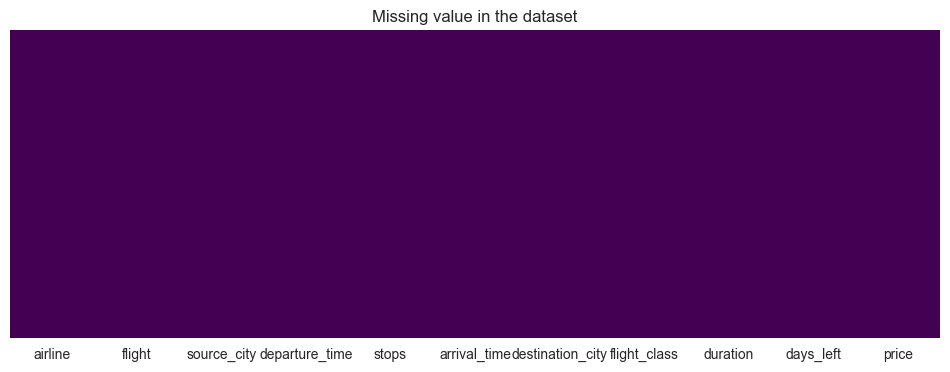

In [33]:
# no missing data visualisation
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

### Visualizations. Plots for data exploring

**Features**

The various features of the cleaned dataset are explained below:
1) Airline. The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight. Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City. City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time. This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops. A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time. This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City. City where the flight will land. It is a categorical feature having 6 unique cities.
8) Flight_class. A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration. A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left. This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price. Target variable stores information of the ticket price.

#### General mixed plots

There's something insanely beautiful about bmi distribution, isn't there?
The average BMI in patients is 30.

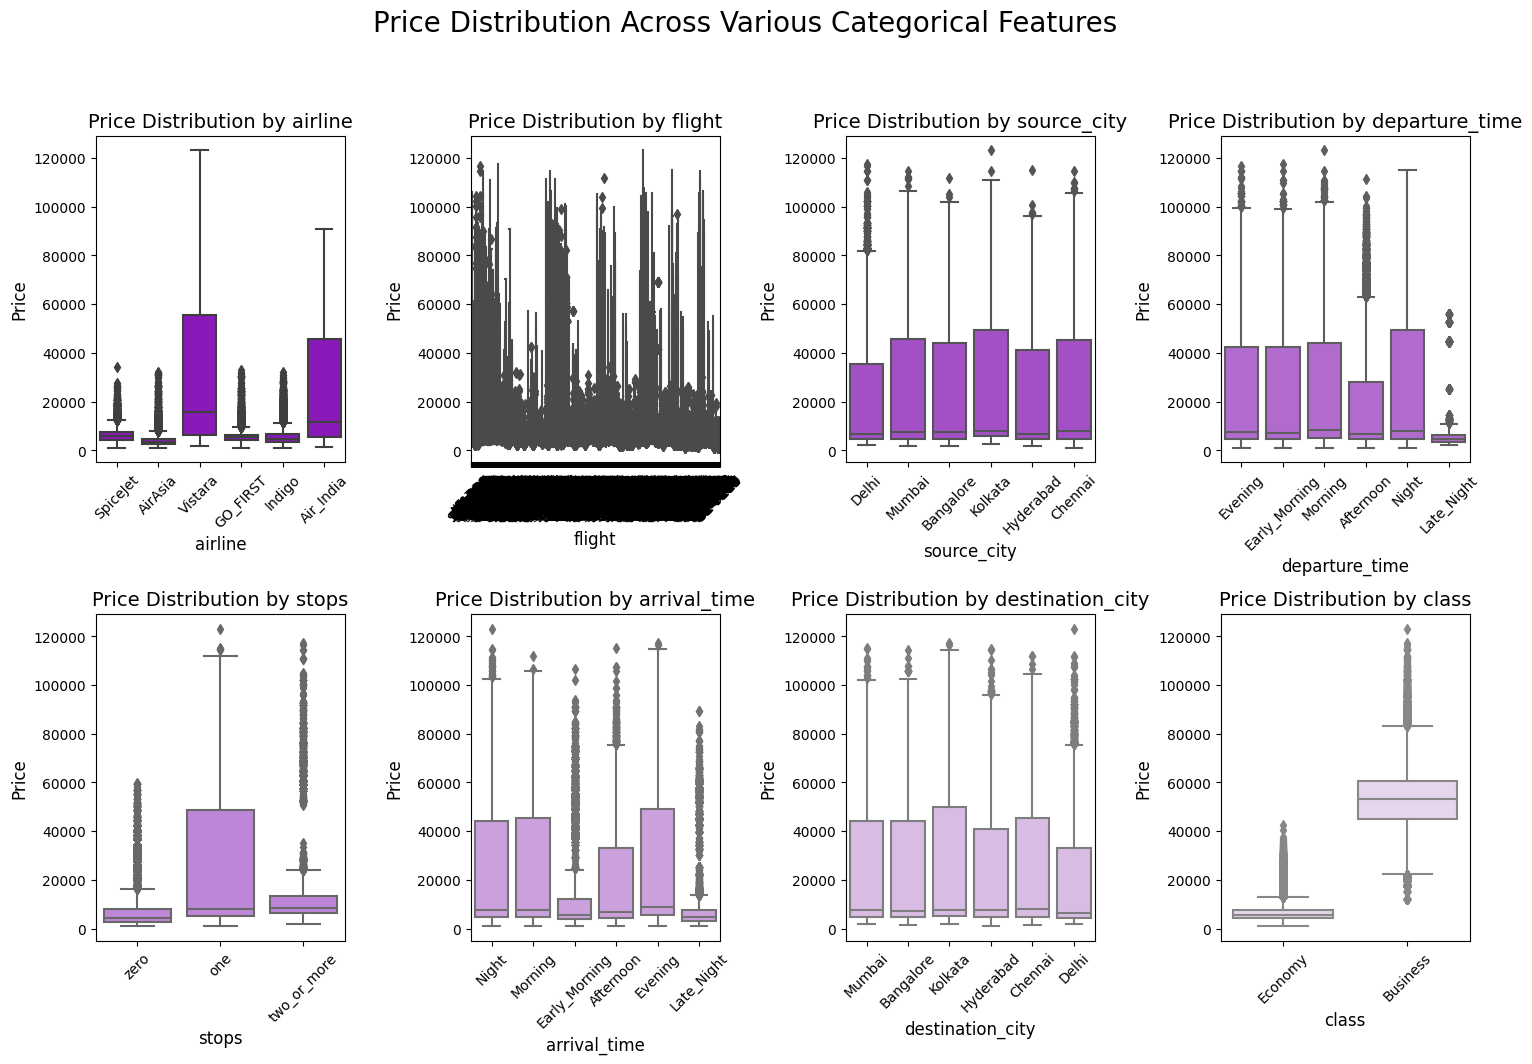

In [17]:
# selecting categorical columns from the DataFrame
categorical_cols = df.select_dtypes(include=['object']).columns

# extracting column names into a list
selected_cols = [col for col in categorical_cols]

# calculating the number of subplots needed
num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(4, num_subplots)

# creating the subplot grid and setting figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')

# adding a title to the figure
fig.suptitle("Price Distribution Across Various Categorical Features", size=20)

# generating a palette of colors for visualization
colors = sns.light_palette('darkviolet', n_colors=len(selected_cols)+1, reverse=True)

# plotting boxplots for each selected categorical feature
for idx, col in enumerate(selected_cols):
    row = idx // num_cols
    col_idx = idx % num_cols
    ax = axes[idx] if num_rows == 1 else axes[row, col_idx]
    sns.boxplot(x=col, y='price', data=df, ax=ax, palette=[colors[idx]])
    ax.set_title(f'Price Distribution by {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Price", fontsize=12)
    ax.tick_params(axis='x', rotation=45)

# removing excess empty subplots if there are any
for ax in axes.flat[num_subplots:]:
    ax.remove()

# adjusting layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# displaying the plot
plt.show()

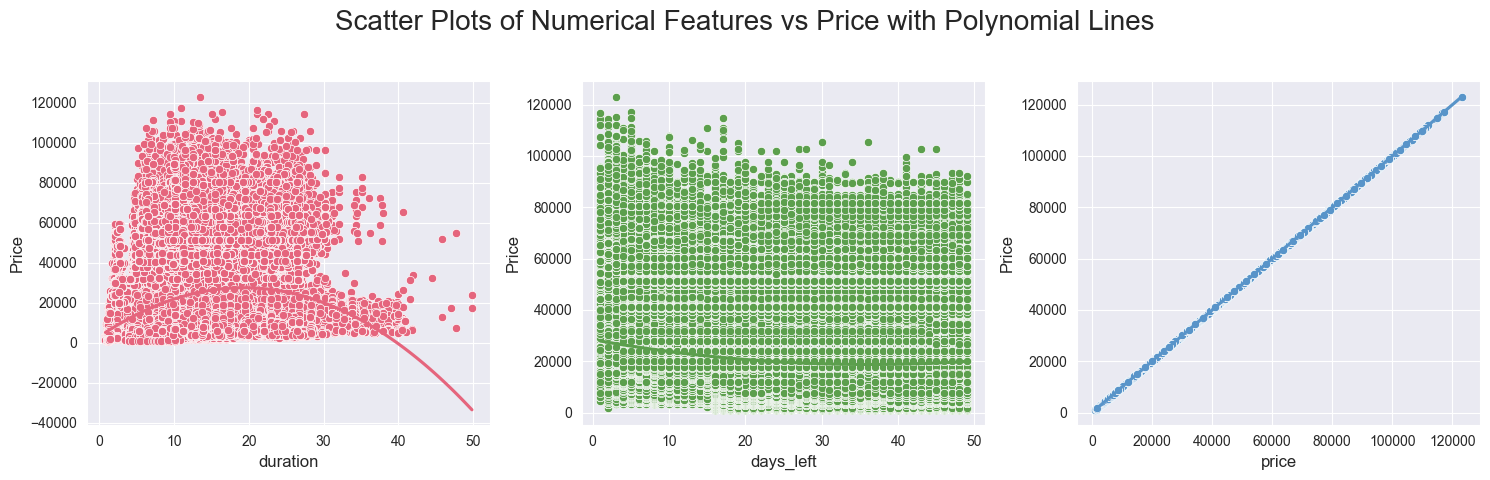

In [38]:
# selecting numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# excluding the 'charges' column from the selected numerical features
selected_cols = [col for col in numerical_cols if col != 'charges']

# calculating the number of subplots needed
num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

# creating the subplot grid and setting figure size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')

# adding a title to the figure
fig.suptitle("Scatter Plots of Numerical Features vs Price with Polynomial Lines", size=20)

# generating a palette of colors for visualization
palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)

# plotting scatter plots with polynomial lines for each selected numerical feature
for idx, col in enumerate(selected_cols):
    if num_rows == 1 or num_cols == 1:
        ax = axes[idx]
    else:
        row = idx // num_cols
        col_idx = idx % num_cols
        ax = axes[row, col_idx]
        
    sns.scatterplot(x=col, y='price', data=df, ax=ax, color=palette[idx])
    sns.regplot(x=col, y='price', data=df, ax=ax, scatter=False, order=2, color=palette[idx], ci=None)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Price", fontsize=12)

# removing excess empty subplots if there are any
for ax in axes.flat[num_subplots:]:
    ax.remove()

# adjusting layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# displaying the plot
plt.show()

### Detailed plots 

In [41]:
# print all columns and their indexes
for index, value in enumerate(df.columns) :
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


Total number of Flights from one city to another.

In [86]:
df.groupby(['flight','source_city','destination_city','airline','flight_class'], 
           as_index=False).count().groupby(['source_city','destination_city'],
           as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


Average Price of different Airlnes from Source city to Destination city.

In [87]:
df.groupby(['airline','source_city','destination_city'],
           as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


##### Exploring airline companies

In [42]:
# print unique values for airline
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

##### Statistics for popularity of each company airline
- Most used airline is Vistara (43% of all flights, 127859 flights).
- Second place is Air_India (27% of all flights, 80892 flights).
- Less used airline is SpiceJet (3% of all flights, 9011 flights).

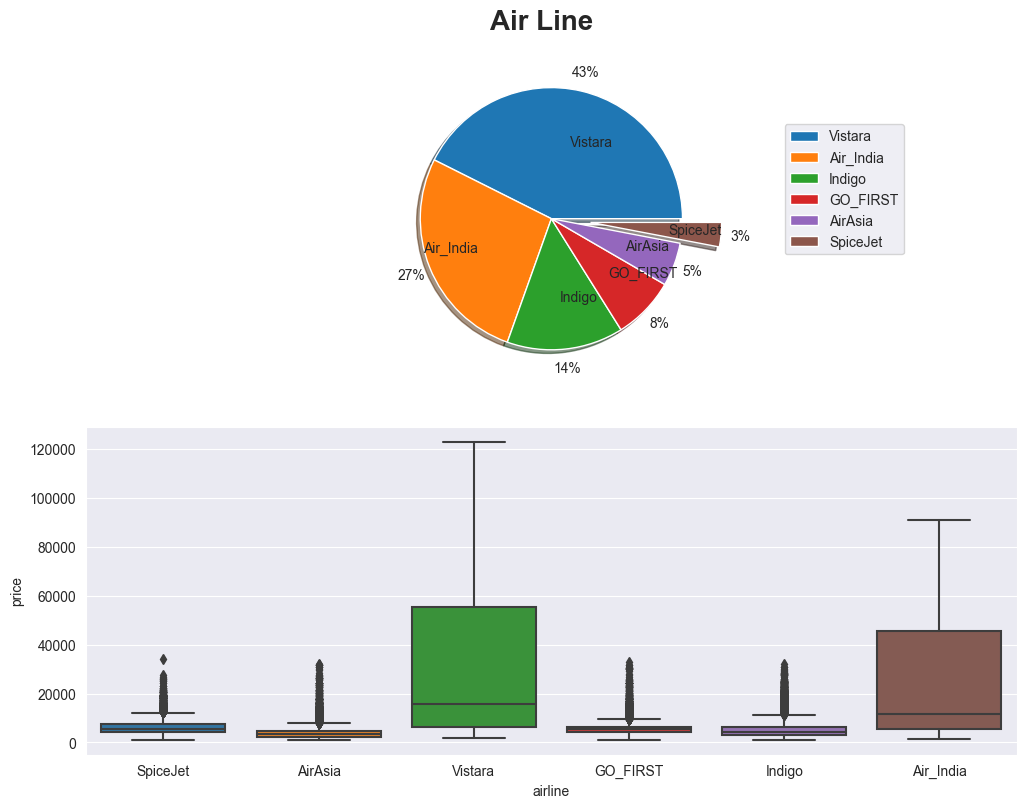

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('Airline', fontsize=20, fontweight='bold')
plt.tight_layout()
# top ax
labels = df.airline.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='airline', y='price', data=df, ax=ax[1])

plt.show()

##### Exploring flight (like ID feature)

In [46]:
len(df.flight.value_counts())

1561

Because of large values of unique values, I can not plot this column.
Flight name is like a ID, so its not nessasary for modeling and will drop from dataframe.

In [28]:
df.drop(columns='flight', inplace=True)

##### Exploring source cities of flights

In [48]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

**Source City Vs Ticket Price**
1. Almost number of all flights source is equal.
2. Ticket Price is More for the Flights whose Source City is Kolkata.
3. Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore.
4. Ticket Price is Low for the Flights Having Source City as Delhi.

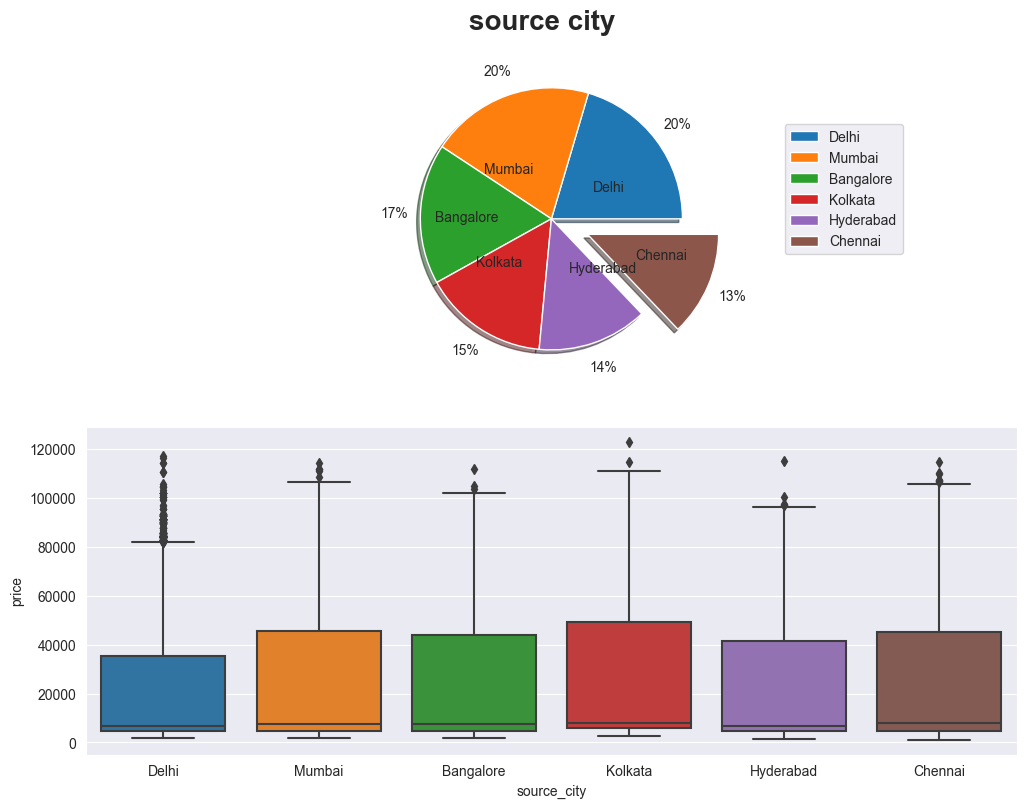

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('source city', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = df.source_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.source_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='source_city', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring departure time

In [51]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

**Departure Time Vs Ticket Price**

1. Except at the end of Late_Night, the frequency of the rest of the departure_time is almost equal.
2. Ticket Price is More for the Flights when the Departure Time is at Night.
3. Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening.
4. Ticket Price is Low for the Flights Having Departure Time at Late_night.

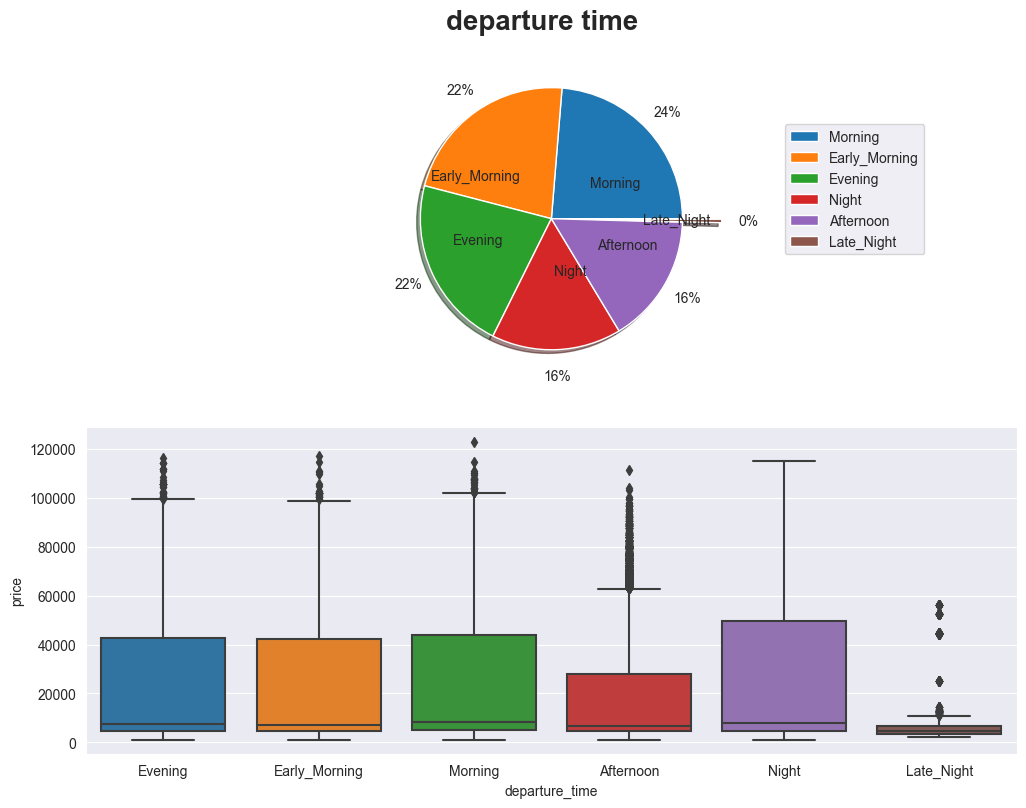

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('departure time', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = df.departure_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.departure_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='departure_time', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring flight stops

In [53]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

- Most of the flights have 1 stop (about 84% , 250863 flights).
- Just 4% of flights have 2 or more than 2 stops during their flights.
- About 12% of flights have not any stop.(13286 flights).

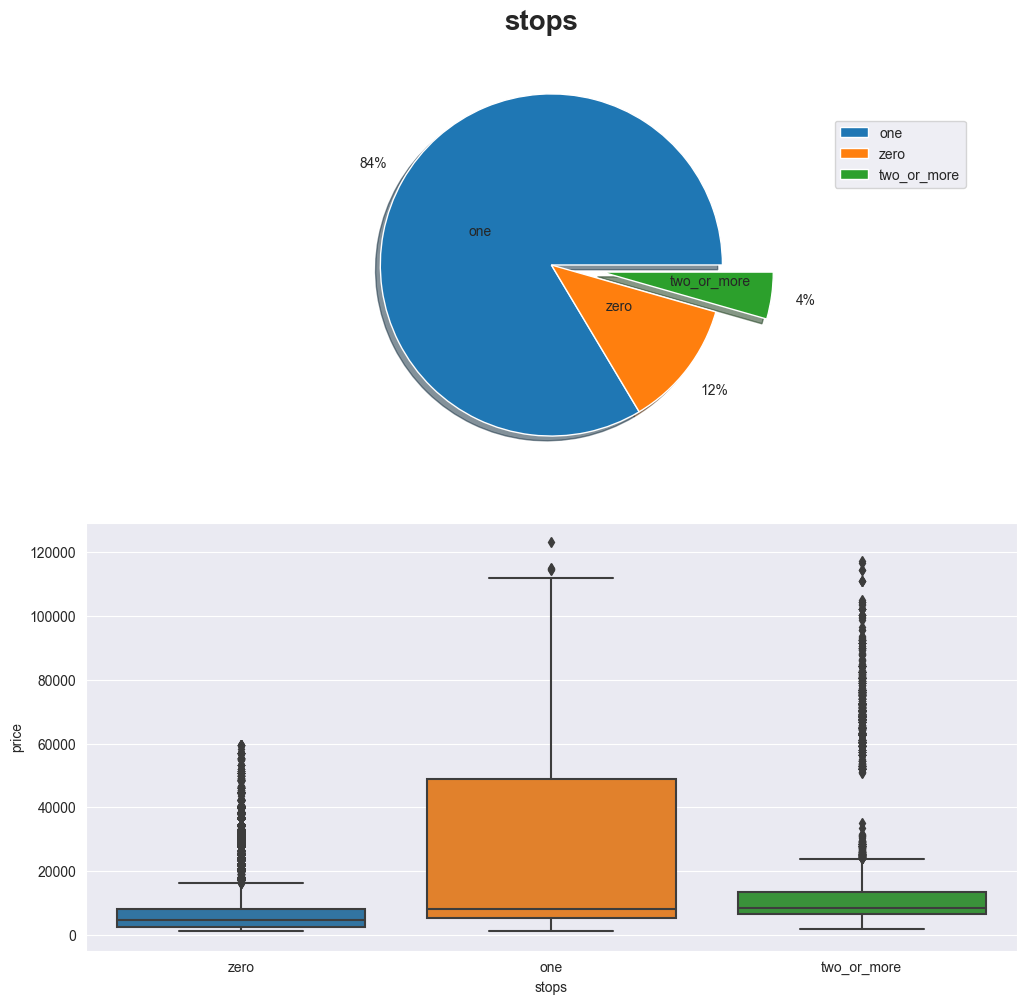

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()
# Top ax
labels = df.stops.value_counts().index.tolist()
explode = (0, 0, 0.3)
ax[0].pie(df.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='stops', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring flight arrival time

In [56]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

**The three most popular arrival times, based on the provided data, are:**
1. Night: 91,538 arrivals.
2. Evening: 78,323 arrivals.
3. Morning: 62,735 arrivals.

**Arrival Time Vs Ticket Price**
1. Ticket Price is More for the Flights when the Arrival Time is at Evening.
2. Ticket Price is almost equal for flights Having Arrival time is at Morning and Night.
3. Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time.

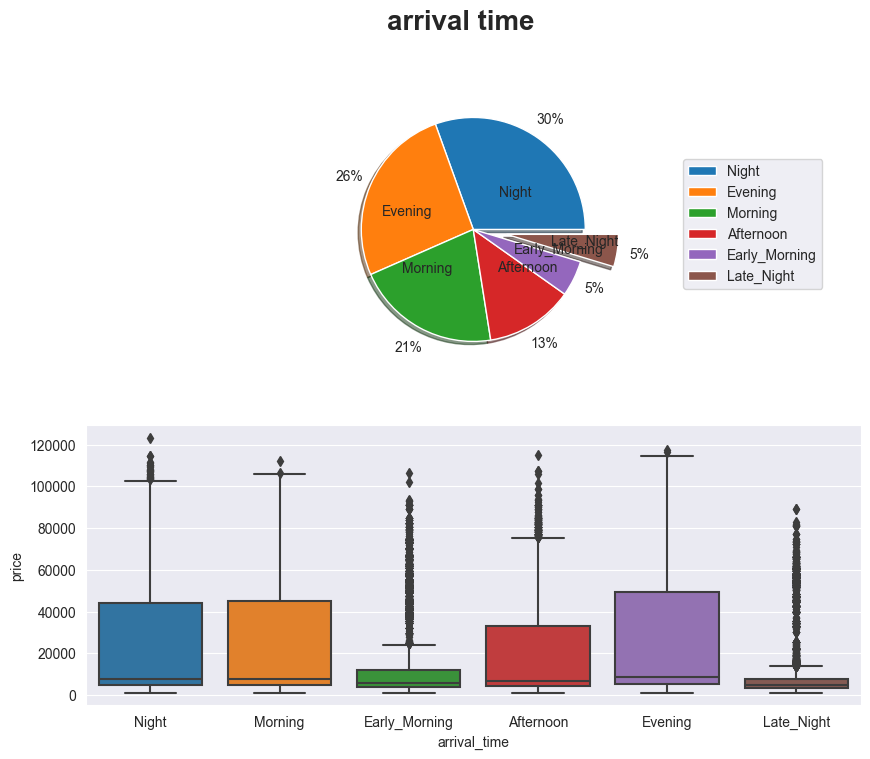

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival time', fontsize=20, fontweight='bold')
# top ax
labels = df.arrival_time.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='arrival_time', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring destination city of flight

In [58]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

**Destination City Vs Ticket Price**
1. Except at the city Kolkata, the frequency of the rest of the destination_city is almost equal.
2. Ticket Price is More for the Flights whose Destination City is kolkata and Chennai.
3. Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore.
4. Ticket Price is Low for the Flights Having Destination City as Delhi.

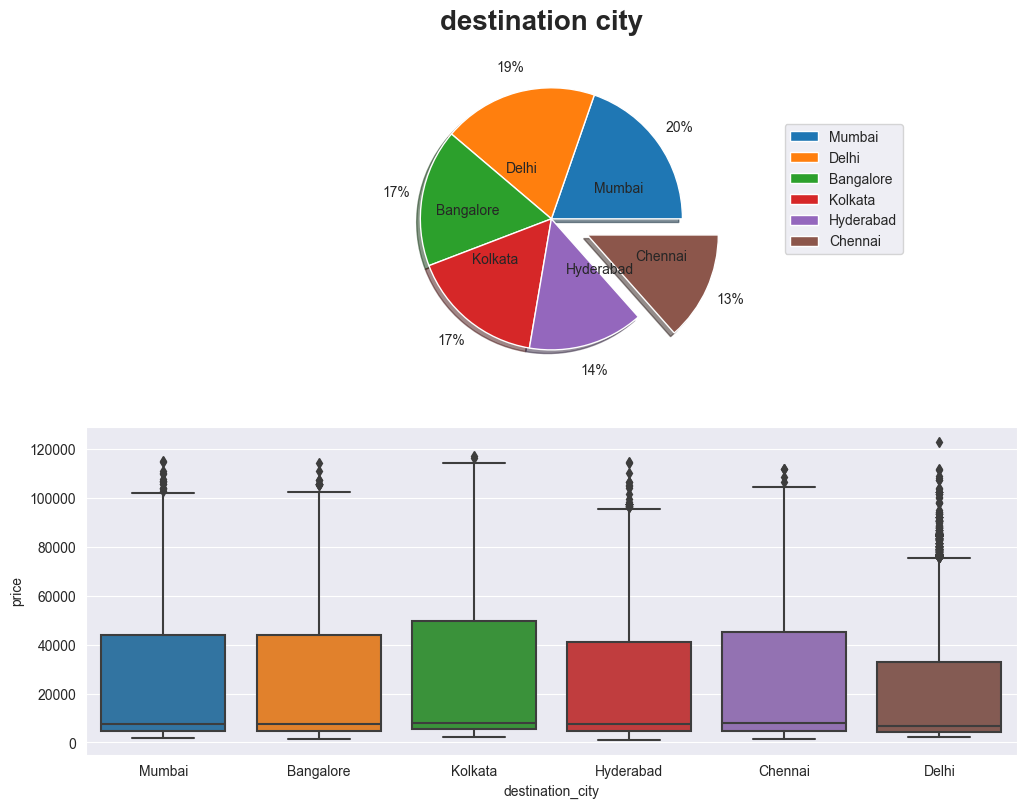

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination city', fontsize=20, fontweight='bold')
plt.tight_layout()
# top ax
labels = df.destination_city.value_counts().index.tolist()
explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='destination_city', y='price', data=df, ax=ax[1])
plt.show()

##### Exploring flight class

In [60]:
df.flight_class.value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

* Obviously Business classes are more expensive than Economic.
* Most of flights are Economy (about 69%).

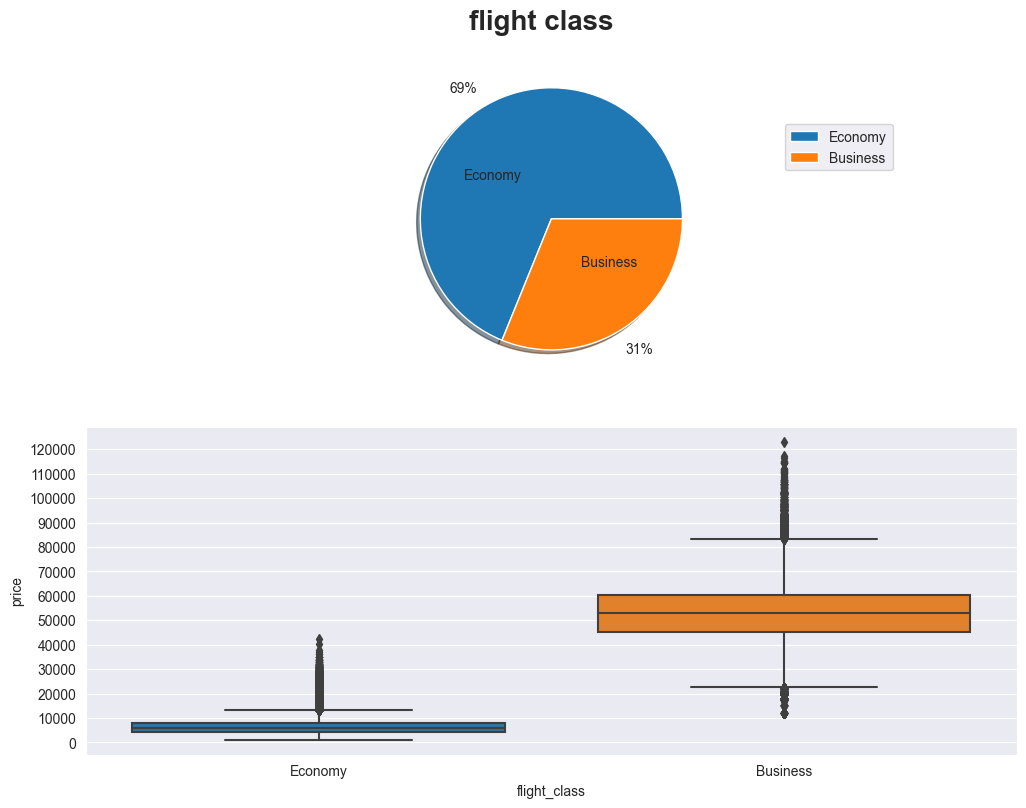

In [61]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight class', fontsize=20, fontweight='bold')
plt.tight_layout()
# top ax
labels = df.flight_class.value_counts().index.tolist()
# explode = (0, 0, 0, 0, 0, 0.3)
ax[0].pie(df.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=5)

# bottom ax
sns.boxplot(x='flight_class', y='price', data=df, ax=ax[1]).set_yticks(np.arange(0, 130000, 10000))
plt.show()

##### Exploring duration of each flight

In [62]:
len(df.duration.value_counts())

476

- In Business class, from 1 to 5 hours, price growth sharply.
- In Business class for durations more than 5, Price in a channel between 45000 to 60000.
- In Economy class growth of price have a linear growth and for duration=47 have a sharp raise in prices.
- With increase in Duration, the Ticket Price is also Increases In both the Economy and Business classes.

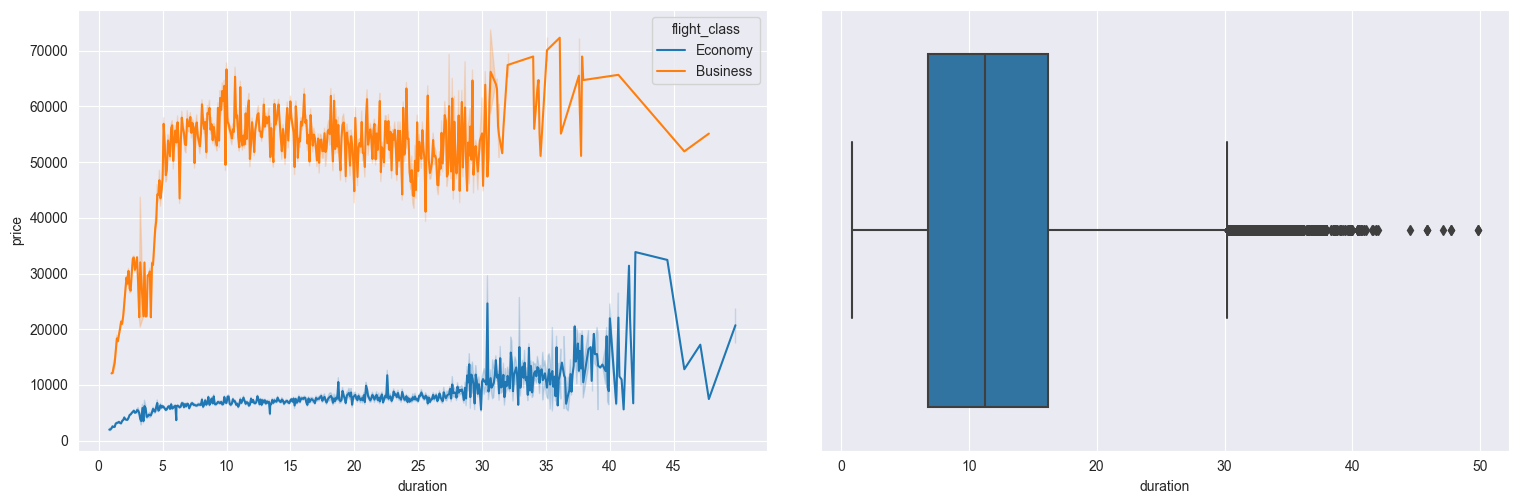

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

# left ax
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='flight_class').set_xticks(np.arange(0, 50, 5))

# right AX
sns.boxplot(data=df, x='duration', ax=ax[1])
# set the style 
sns.set_style("ticks")

plt.show()

##### Exploring days left to flight departure

In [69]:
len(df.days_left.value_counts())

49

The earlier customer book ticket, the less client will pay (for values greater than 2).

As we can see when compared to others when there are two days remaining for departure then the Ticket Price is very High for all airlines.

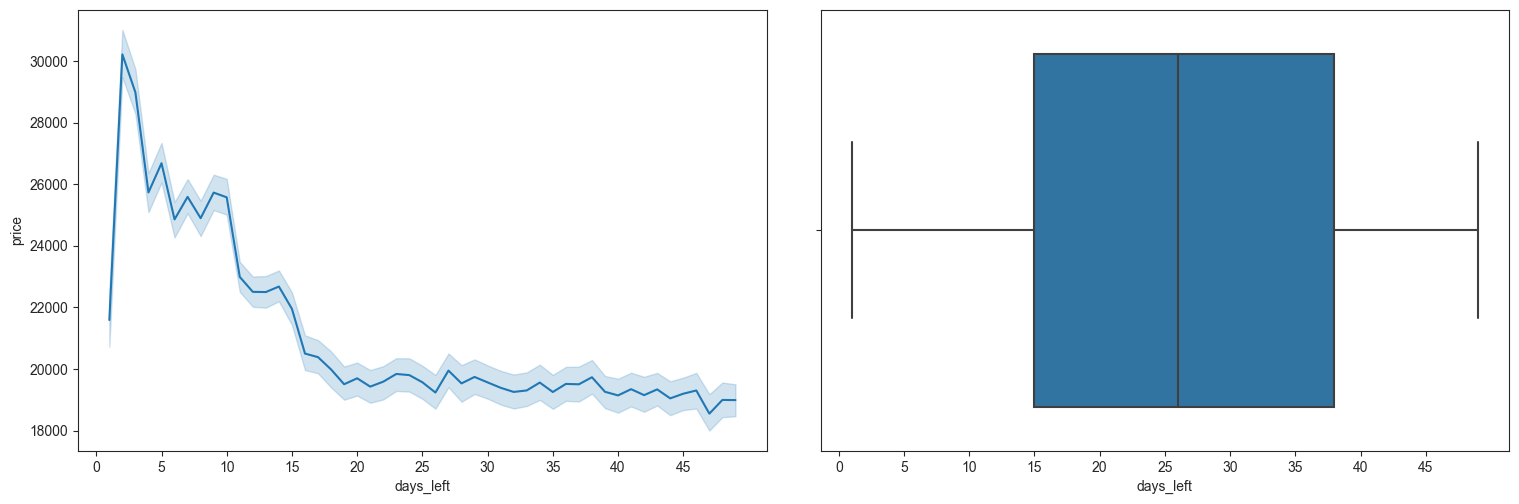

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

# left ax
sns.lineplot(x='days_left', y='price', data=df, ax=ax[0]).set_xticks(np.arange(0, 50, 5))
# right AX
sns.boxplot(data=df, x='days_left', ax=ax[1]).set_xticks(np.arange(0, 50, 5))
plt.show()

##### Exploring flight prices
Most of it lay between 500 and 41000 USA dollars.

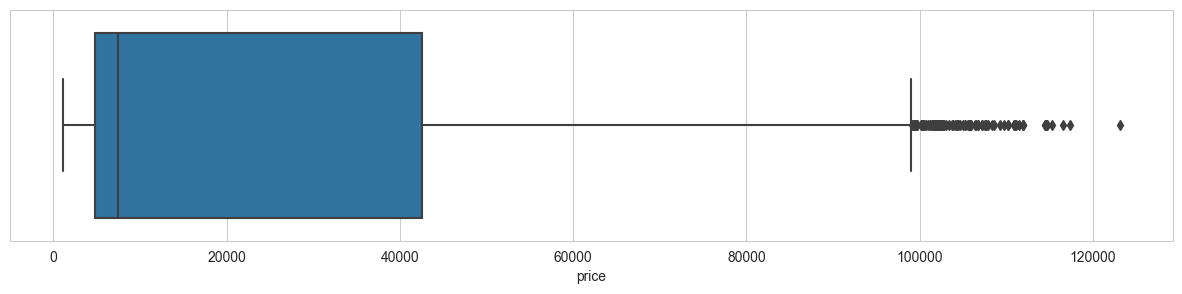

In [72]:
plt.figure(figsize=(15, 3))
sns.boxplot(data=df, x='price')
plt.show()

##### Correlation plot without categorical variables

<Axes: >

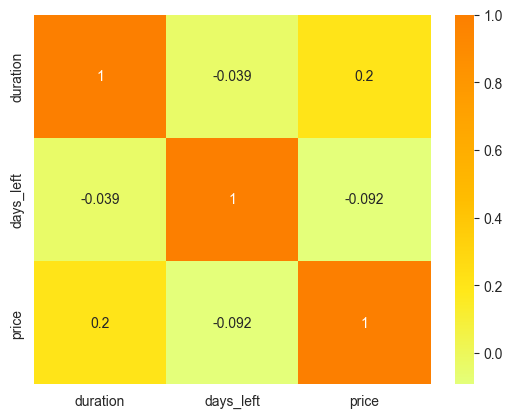

In [40]:
# features for matrix
col_for_corr = ['duration', 'days_left', 'price']

# correlation matrix calculation
corr = df[col_for_corr].corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

## Feature engineering

Feature engineering is the process of selecting and transforming variables (features) to improve model performance in machine learning tasks. It involves creating new features, selecting relevant ones, and encoding categorical variables, among other techniques.

Importance of Feature Engineering:
- **Improved Model Performance**. Well-engineered features can lead to better model accuracy and generalization.
- **Better Interpretability**. Properly engineered features can make models more interpretable and understandable.
- **Reduced Overfitting**. Feature engineering can help in reducing overfitting by providing the model with more relevant information.

#### Techniques in Feature Engineering
1. **Imputation**. Handling missing values in the dataset using techniques like mean, median, or mode imputation.
2. **Feature Scaling**. Scaling features to a similar range, such as normalization or standardization, to prevent bias in models.
3. **Feature Encoding**. Converting categorical variables into numerical format, such as one-hot encoding or label encoding.
4. **Feature Transformation**. Transforming features using techniques like logarithm, square root, or Box-Cox transformation to make them more suitable for modeling.
5. **Feature Selection**. Selecting the most relevant features using techniques like correlation analysis, feature importance, or recursive feature elimination.
6. **Interaction Features**. Creating new features by combining existing ones, such as product or ratio features, to capture interaction effects.
7. **Dimensionality Reduction**. Reducing the number of features using techniques like Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) to simplify the model.


### Encoding Categorical Features with LabelEncoder()

Categorical variables are non-numeric variables that represent categories or groups. Label encoding is a technique used to convert categorical variables into numerical format, where each category is assigned a unique integer.

Object Columns to Encode: airline	source_city	departure_time	stops	arrival_time	destination_city	flight_class

In [29]:
# initialize the LabelEncoder
le = LabelEncoder()

In [30]:
# airline feature
le.fit(df.airline.drop_duplicates()) 
df.airline = le.transform(df.airline)

In [31]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'AirAsia': 0, 'Air_India': 1, 'GO_FIRST': 2, 'Indigo': 3, 'SpiceJet': 4, 'Vistara': 5}


In [32]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,4,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


A few words about coding "cities". In general, categorical variables with large variability are best encoded using OneHotEncoder and so on. But in this case, nothing will change, because there is no special order in which the regions would be listed

In [33]:
# unique features from source_city
source_unique_values = df['source_city'].drop_duplicates()

# unique features from destination_city
destination_unique_values = df['destination_city'].drop_duplicates()

# union two dict
all_unique_values = pd.concat([source_unique_values, destination_unique_values]).unique()

In [34]:
# fit encoder
le.fit(all_unique_values)

# transform source_city
df['source_city'] = le.transform(df['source_city'])

# transform destination_city
df['destination_city'] = le.transform(df['destination_city'])

In [35]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Mumbai': 5}


In [36]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,Evening,zero,Night,5,Economy,2.17,1,5953
1,4,2,Early_Morning,zero,Morning,5,Economy,2.33,1,5953
2,0,2,Early_Morning,zero,Early_Morning,5,Economy,2.17,1,5956
3,5,2,Morning,zero,Afternoon,5,Economy,2.25,1,5955
4,5,2,Morning,zero,Morning,5,Economy,2.33,1,5955


In [37]:
# unique features from departure_time
departure_unique_values = df['departure_time'].drop_duplicates()

# unique features from arrival_time
arrival_unique_values = df['arrival_time'].drop_duplicates()

# union two dict
all_unique_values = pd.concat([departure_unique_values, arrival_unique_values]).unique()
print(all_unique_values)

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


In [38]:
# fit encoder
le.fit(all_unique_values)

# transform departure_time
df['departure_time'] = le.transform(df['departure_time'])

# transform arrival_time
df['arrival_time'] = le.transform(df['arrival_time'])

In [39]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'Afternoon': 0, 'Early_Morning': 1, 'Evening': 2, 'Late_Night': 3, 'Morning': 4, 'Night': 5}


In [32]:
# departure_time feature
# le.fit(df.departure_time.drop_duplicates()) 
# df.departure_time = le.transform(df.departure_time)
# get the mapping between original categories and encoded values
# encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print(encoded_mapping)

In [29]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,zero,5,5,Economy,2.17,1,5953
1,4,2,1,zero,4,5,Economy,2.33,1,5953
2,0,2,1,zero,1,5,Economy,2.17,1,5956
3,5,2,4,zero,0,5,Economy,2.25,1,5955
4,5,2,4,zero,4,5,Economy,2.33,1,5955


In [30]:
# flight_class feature
le.fit(df.flight_class.drop_duplicates()) 
df.flight_class = le.transform(df.flight_class)

In [31]:
# get the mapping between original categories and encoded values
encoded_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(encoded_mapping)

{'Business': 0, 'Economy': 1}


In [32]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,zero,5,5,1,2.17,1,5953
1,4,2,1,zero,4,5,1,2.33,1,5953
2,0,2,1,zero,1,5,1,2.17,1,5956
3,5,2,4,zero,0,5,1,2.25,1,5955
4,5,2,4,zero,4,5,1,2.33,1,5955


In [33]:
# stops encode columns
df.stops = df.stops.replace(
    {
        'zero' : 0,
        'one' : 1,
        'two_or_more' : 2
    }
)

In [34]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,0,5,5,1,2.17,1,5953
1,4,2,1,0,4,5,1,2.33,1,5953
2,0,2,1,0,1,5,1,2.17,1,5956
3,5,2,4,0,0,5,1,2.25,1,5955
4,5,2,4,0,4,5,1,2.33,1,5955


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   source_city       300153 non-null  int32  
 2   departure_time    300153 non-null  int32  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int32  
 5   destination_city  300153 non-null  int32  
 6   flight_class      300153 non-null  int32  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int32(6), int64(3)
memory usage: 16.0 MB


#### Save the new encoded dataset

In [36]:
df_encoded = df.copy()
df_encoded.to_csv('.//flight_price_encoded.csv', index=False)

In [16]:
dataset_encoded_path = "D://programming//information-technologies-of-smart-systems//term-paper//flight_price_encoded.csv"

In [14]:
# is there such path?
print(os.path.exists(dataset_encoded_path))

True


In [17]:
df_encoded= pd.read_csv(dataset_encoded_path)

#### Correlation plot with encoded categorical variables

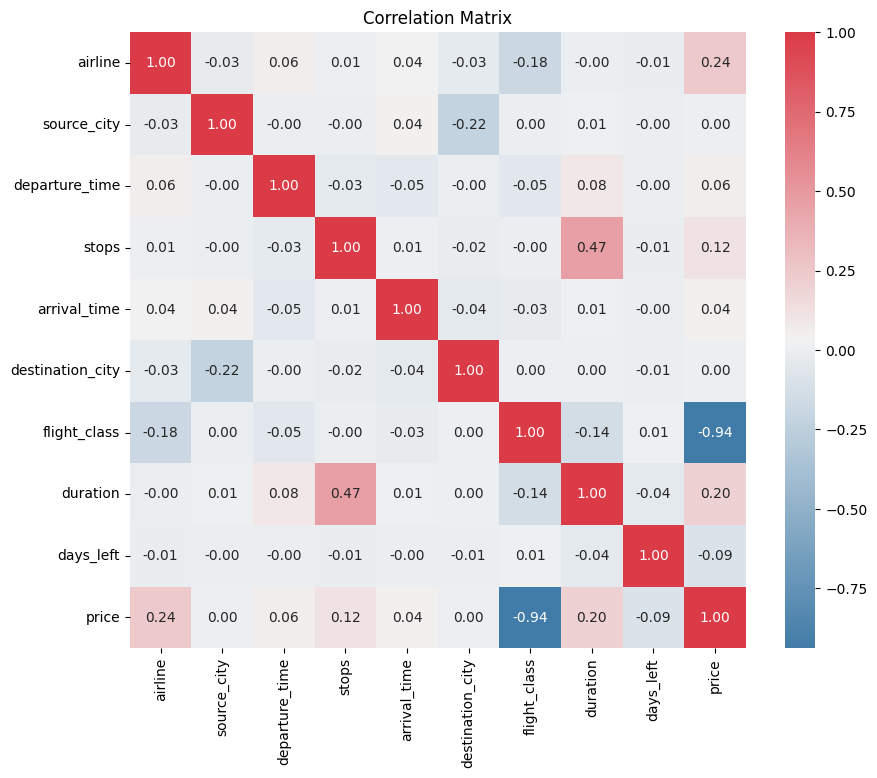

In [40]:
# create a subplot with specified figure size
f, ax = plt.subplots(figsize=(10, 8))

corr = df.corr()

# create a heatmap of the correlation matrix
# set the mask to hide the upper triangle of the heatmap
# set the color map using seaborn's diverging_palette
# add annotations to display correlation values in each cell
# format annotations to two decimal places
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True, fmt=".2f")

ax.set_title('Correlation Matrix')
plt.show()

In [69]:
# corelation matrix in text output 
corr = df.corr()
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
                   airline  source_city  departure_time     stops  \
airline           1.000000    -0.028350        0.056885  0.006749   
source_city      -0.028350     1.000000       -0.004688 -0.000560   
departure_time    0.056885    -0.004688        1.000000 -0.031022   
stops             0.006749    -0.000560       -0.031022  1.000000   
arrival_time      0.037714     0.044153       -0.046282  0.007760   
destination_city -0.030172    -0.222935       -0.001761 -0.017768   
flight_class     -0.178862     0.000075       -0.053340 -0.001027   
duration         -0.001651     0.008619        0.084348  0.468059   
days_left        -0.010678    -0.003568       -0.001597 -0.008540   
price             0.243358     0.004594        0.058319  0.119648   

                  arrival_time  destination_city  flight_class  duration  \
airline               0.037714         -0.030172     -0.178862 -0.001651   
source_city           0.044153         -0.222935      0.000075  0.00

### Outlier Engineering
Outliers are data points that significantly differ from other observations in a dataset. Outlier engineering involves identifying and handling these outliers to prevent them from adversely affecting model performance.

#### Techniques for Outlier Engineering
1. **Identification**:
   - Statistical Methods: Use statistical techniques such as Z-score, interquartile range (IQR), or modified Z-score to identify outliers.
   - Visualization: Plotting techniques like box plots, scatter plots, or histograms can help visually identify outliers.
   - Domain Knowledge: Leverage domain knowledge to identify anomalies that may be outliers in the dataset.
2. **Handling Outliers**:
   - Removal. Exclude outliers from the dataset if they are deemed to be errors or anomalies.
   - Transformation. Apply transformations such as log transformation or Winsorization to mitigate the impact of outliers.
   - Imputation. Impute outliers with more representative values using techniques like mean, median, or nearest neighbors.
3. **Model-Specific Approaches**:
   - Robust Models. Use robust machine learning algorithms that are less sensitive to outliers, such as robust regression or tree-based models.
   - Weighted Models. Assign different weights to outliers or downsample them to reduce their influence on the model.
4. **Ensemble Methods**:
   - Ensemble techniques like bagging or boosting can help in reducing the impact of outliers by combining predictions from multiple models.

In [74]:
# function to create histogram, Q-Q plot and

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, color='lightgreen')
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    plt.gca().get_lines()[0].set_color('blue')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable], color='darkorange')
    plt.title('Boxplot')

    plt.show()

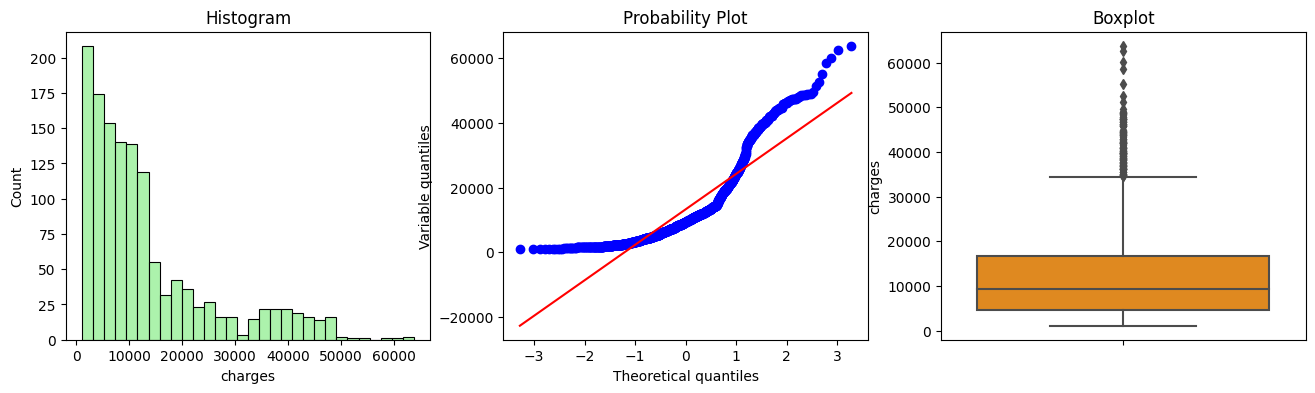

In [214]:
# let's find outliers in charges
diagnostic_plots(df, 'charges')

In [71]:
# display unique values of each feature
df.nunique()

airline                 6
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
flight_class            2
duration              476
days_left              49
price               12157
dtype: int64

In [115]:
def visualize_anomalies(data):
    """
    Function takes input data in DataFrame format and displays plots to assess the presence of anomalies in numerical features.
    """
    # Set the style of the plots
    sns.set_style("whitegrid")
    
    # Create a new figure object and set the size
    plt.figure(figsize=(12, 6))
    
    # Plot for the feature "duration"
    plt.subplot(1, 3, 1)
    sns.boxplot(y=data['duration'], color='skyblue')
    plt.title('Duration')
    
    # Plot for the feature "days_left"
    plt.subplot(1, 3, 2)
    sns.boxplot(y=data['days_left'], color='salmon')
    plt.title('Days Left')
    
    # Plot for the feature "price"
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data['price'], color='lightgreen')
    plt.title('Price')
    
    # Display the plots
    plt.tight_layout()
    plt.show()

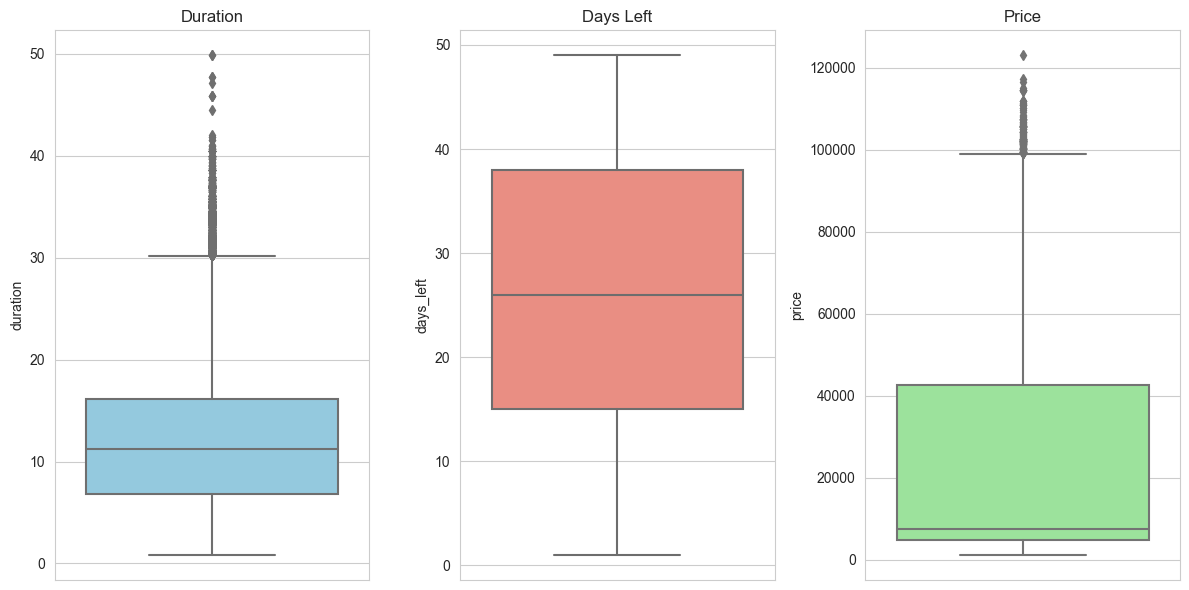

In [116]:
visualize_anomalies(df)

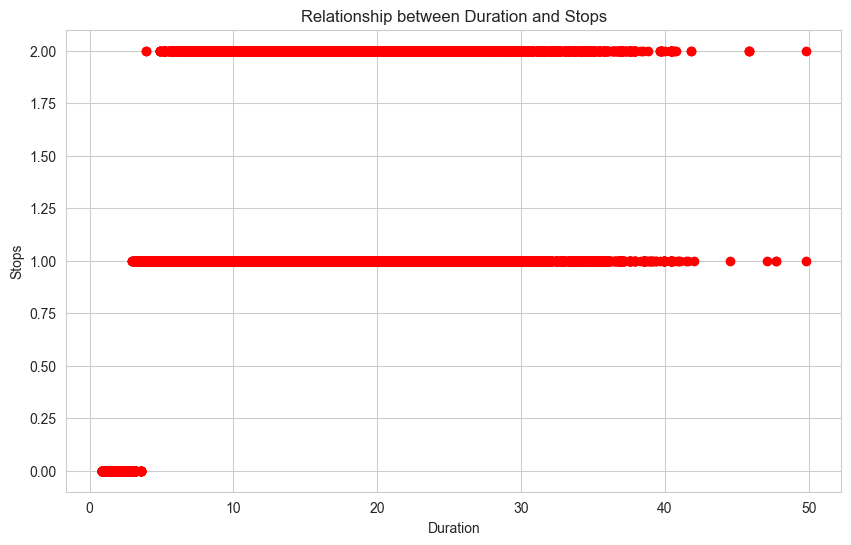

In [125]:
# Overall plot size
plt.figure(figsize=(10, 6))

# Create a horizontal bar plot
plt.scatter(df.duration, df.stops, color='red')

# Axis labels and title settings
plt.xlabel('Duration')
plt.ylabel('Stops')
plt.title('Relationship between Duration and Stops')

# Display the plot
plt.show()

In [126]:
# filter data by duration
filtered_data = df[df['duration'] > 40]

print(filtered_data)

        airline  source_city  departure_time  stops  arrival_time  \
84180         1            0               1      1             3   
115024        1            0               1      2             5   
115297        1            0               1      2             5   
115639        1            0               1      2             5   
116113        1            0               0      2             1   
119508        1            0               2      1             2   
127708        1            4               1      2             5   
127817        1            4               1      2             5   
128088        1            4               1      2             5   
128235        1            4               1      2             5   
128385        1            4               1      2             5   
128653        1            4               1      2             5   
128840        1            4               1      2             5   
129204        1            4      

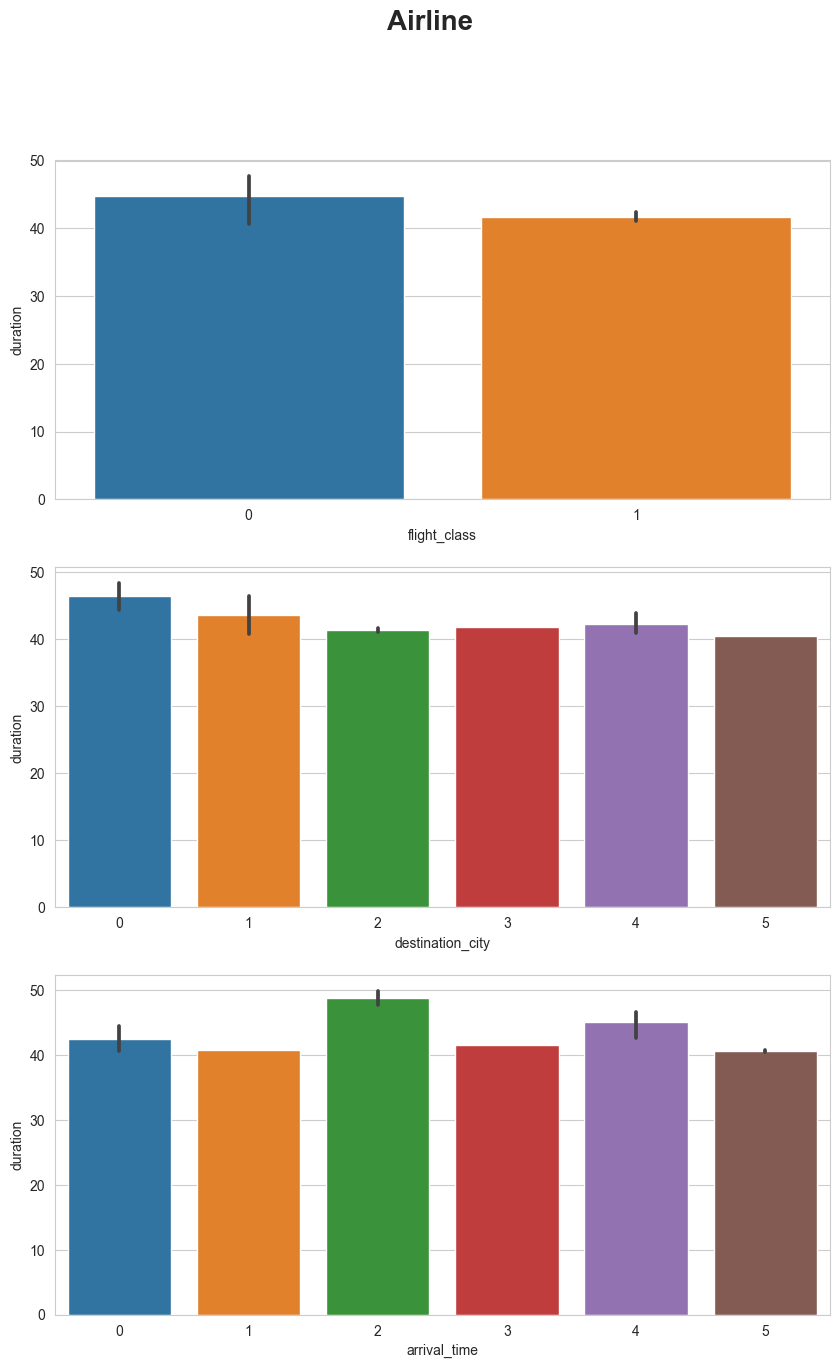

In [161]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
fig.suptitle('Airline', fontsize=20, fontweight='bold')

# Create a bar plot
sns.barplot(x='flight_class', y='duration', data=filtered_data, ax=ax[0])

sns.barplot(x='destination_city', y='duration', data=filtered_data, ax=ax[1])

sns.barplot(x='arrival_time', y='duration', data=filtered_data, ax=ax[2])

plt.show()

### Numeric Data Normalization

#### MinMaxScaler()
[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:
1. X<sub>std</sub> = (X - X<sub>min</sub>(axis=0)) / (X<sub>max</sub>(axis=0) - X<sub>min</sub>(axis=0))
2. X<sub>scaled</sub> = X<sub>std</sub> * (max - min) + min

where min, max = feature_range.

This transformation is often used as an alternative to zero mean, unit variance scaling.

MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range, where the largest occurring data point corresponds to the maximum value and the smallest one corresponds to the minimum value. For an example visualization, refer to [Compare MinMaxScaler with other scalers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-minmax-scaler-section).

airline                 6
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
flight_class            2
duration              476
days_left              49
price               12157
dtype: int64

In [41]:
# normalization: with the MinMaxScaler() from sklearn

# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
X_tmp = df_encoded[['airline', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'flight_class', 'duration', 'days_left']]
# transform train and test sets
scaler = MinMaxScaler().fit_transform(X_tmp)

In [42]:
# let's transform the returned NumPy arrays to dataframes for the rest of the demo
X = pd.DataFrame(scaler, columns=X_tmp.columns)

In [43]:
# the scaler stores the min/max of the features, learned from train set
X.describe().T[['min', 'mean', 'std', '50%', 'max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.620975,0.366653,0.600000,1.000000
source_city,0.000000,0.515518,0.350352,0.400000,1.000000
departure_time,0.000000,0.483467,0.350855,0.400000,1.000000
stops,0.000000,0.462156,0.199053,0.500000,1.000000
arrival_time,0.000000,0.614817,0.348333,0.800000,1.000000
destination_city,0.000000,0.517661,0.348909,0.600000,1.000000
flight_class,0.000000,0.688536,0.463093,1.000000,1.000000
duration,0.000000,0.232470,0.146775,0.212653,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000


In [44]:
df_encoded_MinMaxScaler = df_encoded.copy()

In [45]:
# check contents of scaled columns
X.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,0.8,0.4,0.4,0.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.4,0.2,0.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.4,0.2,0.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.4,0.8,0.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.4,0.8,0.0,0.8,1.0,1.0,0.030612,0.0


In [46]:
# replace the data in the df_encoded_MinMaxScaler variable using the data from the MinMaxScaled variable

# list of column names in X_ymp
columns_to_replace = X_tmp.columns

# iterate over the columns to replace in df_encoded_MinMaxScaler
for column in columns_to_replace:
    df_encoded_MinMaxScaler[column] = X[column]

In [47]:
# check content of copy of dataset with scaled features
df_encoded_MinMaxScaler.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,0.8,0.4,0.4,0.0,1.0,1.0,1.0,0.027347,0.0,5953
1,0.8,0.4,0.2,0.0,0.8,1.0,1.0,0.030612,0.0,5953
2,0.0,0.4,0.2,0.0,0.2,1.0,1.0,0.027347,0.0,5956
3,1.0,0.4,0.8,0.0,0.0,1.0,1.0,0.028980,0.0,5955
4,1.0,0.4,0.8,0.0,0.8,1.0,1.0,0.030612,0.0,5955


In [114]:
df_encoded_MinMaxScaler.to_csv('.//price_encoded_MinMaxScaler.csv', index=False)

In [18]:
ds_encoded_MinMaxScaler_path = "D://programming//information-technologies-of-smart-systems//term-paper//price_encoded_MinMaxScaler.csv"

In [14]:
# is there such path?
if os.path.exists(ds_encoded_MinMaxScaler_path):
    print("File exists at the specified path.")
else:
    print("File does not exist at the specified path.")

File exists at the specified path.


In [115]:
df_encoded_MinMaxScaler= pd.read_csv(ds_encoded_MinMaxScaler_path)

#### StandardScaler()
Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

z = (x - x<sub>mean</sub>) / std

The result of the above transformation is z, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, standardising a variable does not normalize the distribution of the data and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In [52]:
# standardization: with the StandardScaler() from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df_encoded[['airline', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'flight_class', 'duration', 'days_left']])

# transform train and test sets
StandardScaled = scaler.transform(df_encoded[['airline', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'flight_class', 'duration', 'days_left']])

In [53]:
# the scaler stores the mean of the features, learned from train set
print("Mean of features:", scaler.mean_)

# the scaler stores the standard deviation deviation of the features,
# learned from train set
print("Standard deviation of features:", scaler.scale_)

Mean of features: [ 3.10487318  2.57759209  2.41733716  0.92431193  3.07408555  2.5883033
  0.68853551 12.22102081 26.00475091]
Standard deviation of features: [ 1.83326175  1.7517588   1.75427327  0.39810497  1.74166343  1.74454022
  0.46309217  7.19198526 13.5609811 ]


In [54]:
StandardScaled

array([[ 0.48827006, -0.32972125, -0.23789746, ...,  0.67257558,
        -1.39753079, -1.84387477],
       [ 0.48827006, -0.32972125, -0.80793408, ...,  0.67257558,
        -1.3752838 , -1.84387477],
       [-1.69363332, -0.32972125, -0.80793408, ...,  0.67257558,
        -1.39753079, -1.84387477],
       ...,
       [ 1.0337459 , -0.90057609, -0.80793408, ..., -1.48682175,
         0.22371837,  1.69569214],
       [ 1.0337459 , -0.90057609, -0.80793408, ..., -1.48682175,
        -0.30881888,  1.69569214],
       [ 1.0337459 , -0.90057609,  0.90217577, ..., -1.48682175,
        -0.29769538,  1.69569214]])

In [55]:
df_encoded_StandardScaler = df_encoded.copy()

In [56]:
df_encoded_StandardScaler.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,4,2,2,0,5,5,1,2.17,1,5953
1,4,2,1,0,4,5,1,2.33,1,5953
2,0,2,1,0,1,5,1,2.17,1,5956
3,5,2,4,0,0,5,1,2.25,1,5955
4,5,2,4,0,4,5,1,2.33,1,5955


In [57]:
# let's transform the returned NumPy arrays to dataframe
# for the rest of the demo

StandardScaled = pd.DataFrame(StandardScaled, columns=['airline', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'flight_class', 'duration', 'days_left'])

In [58]:
# check contents of scaled columns
StandardScaled.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,0.488270,-0.329721,-0.237897,-2.321779,1.105790,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,-2.321779,0.531627,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,-2.321779,-1.190865,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,-2.321779,-1.765028,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,-2.321779,0.531627,1.382425,0.672576,-1.375284,-1.843875


In [59]:
# replace the data in the df_encoded_StandardScaler variable using the data from the StandardScaled variable

# list of column names in X_tmp
columns_to_replace = X_tmp.columns

# iterate over the columns to replace in df_encoded_MinMaxScaler
for column in columns_to_replace:
    df_encoded_StandardScaler[column] = StandardScaled[column]

In [60]:
# check content of copy of dataset with scaled features
df_encoded_StandardScaler.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
0,0.488270,-0.329721,-0.237897,-2.321779,1.105790,1.382425,0.672576,-1.397531,-1.843875,5953
1,0.488270,-0.329721,-0.807934,-2.321779,0.531627,1.382425,0.672576,-1.375284,-1.843875,5953
2,-1.693633,-0.329721,-0.807934,-2.321779,-1.190865,1.382425,0.672576,-1.397531,-1.843875,5956
3,1.033746,-0.329721,0.902176,-2.321779,-1.765028,1.382425,0.672576,-1.386407,-1.843875,5955
4,1.033746,-0.329721,0.902176,-2.321779,0.531627,1.382425,0.672576,-1.375284,-1.843875,5955


In [61]:
df_encoded_StandardScaler.to_csv('.//price_encoded_StandardScaler.csv', index=False)

In [20]:
ds_encoded_StandardScaler_path = "D://programming//information-technologies-of-smart-systems//term-paper//price_encoded_StandardScaler.csv"

In [19]:
# is there such path?
if os.path.exists(ds_encoded_StandardScaler_path):
    print("File exists at the specified path.")
else:
    print("File does not exist at the specified path.")

File exists at the specified path.


In [21]:
df_encoded_StandardScaler = pd.read_csv(ds_encoded_StandardScaler_path)

For **[Polynomial Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)**, feature scaling is often less critical compared to some other algorithms like SVMs or Neural Networks. However, it can still be beneficial in certain scenarios. Here's a brief overview of how feature scaling can affect Polynomial Regression:

**StandardScaler:**
- StandardScaler scales features to have a mean of 0 and a standard deviation of 1. This can be useful if the features have different scales or units and you want to center them around zero.
- Polynomial features can sometimes lead to multicollinearity, where features are highly correlated. Standardizing the features can mitigate multicollinearity to some extent.

**MinMaxScaler:**
+ MinMaxScaler scales features to a specified range, typically between 0 and 1. It preserves the relationships between the data points and can be useful if you want to bound the features within a specific range.
+ It can also help in cases where the polynomial features are bounded within a certain range and you want to maintain that range in the scaled data.

**No Scaling:**
* In some cases, particularly if the features are already on similar scales or if the polynomial features are generated in a way that preserves the original scale, you may choose not to scale the features at all.
* Additionally, if interpretability of the coefficients is important, you might prefer not to scale the features.

It's often a good idea to experiment with both scalers and evaluate their impact on the model's performance using cross-validation or other validation techniques.

## Modelling

### Regression
Regression in machine learning is a type of supervised learning task where the goal is to predict a continuous output variable based on one or more input features. In simpler terms, regression models try to find the relationship between independent variables (features) and dependent variables (target) and use this relationship to make predictions.

Key points about regression in machine learning:
1. **Continuous Output**: Unlike classification, where the output is a discrete label or category, regression predicts a continuous value. For example, predicting house prices, stock prices, temperature, or sales figures are all regression problems.
2. **Linear Regression**: One of the simplest and most commonly used regression techniques is linear regression, where the relationship between the input features and the target variable is modeled as a linear equation. The goal is to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the actual and predicted values.
3. **Non-linear Regression**: In many real-world scenarios, the relationship between the input features and the target variable may not be linear. In such cases, more complex regression techniques like polynomial regression, decision tree regression, random forest regression, support vector regression, or neural network regression can be used to capture non-linear patterns.
4. **Evaluation Metrics**: Regression models are evaluated using metrics that quantify the difference between the actual and predicted values. Common evaluation metrics for regression include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (coefficient of determination), and others.
5. **Overfitting and Underfitting**: Like other machine learning models, regression models can suffer from overfitting (capturing noise in the training data) or underfitting (failing to capture the underlying patterns). Techniques such as regularization, cross-validation, and feature selection can help mitigate these issues.
6. **Feature Engineering**: Feature engineering plays a crucial role in regression tasks. It involves selecting, transforming, or creating new features from the raw data to improve the model's predictive performance. Techniques like scaling, normalization, encoding categorical variables, handling missing values, and creating interaction terms can be applied to preprocess the data before training the regression model.

Overall, regression is a fundamental technique in machine learning that finds numerous applications in various domains such as finance, healthcare, marketing, and engineering for making predictions and understanding relationships between variables.

#### Baseline regression models with default hyperparameters and **without data scaling**

1. Getting Features and Target.
The code retrieves a list of all features present in the DataFrame df_encoded.
It splits the DataFrame into features (X) without data scaling and target (y). The features are stored in X_base, excluding the 'price' column, while the target is stored in y_base.

2. Splitting Data.
The data is split into training and testing sets (X_train_base, X_test_base, y_train_base, y_test_base) using the train_test_split function. The testing set size is set to 20%, and a random state of 42 is used for reproducibility.

3. Initializing Regression Models.
Several regression models are initialized, including Linear Regression, Ridge Regression, Lasso Regression, K-Nearest Neighbors, Random Forest, XGBoost, Decision Tree, Gradient Boosting, and Extra Tree. Each model is initialized with a specific random state.

4. Model Evaluation.
The code iterates through each regression model and fits it to the training data. It then calculates various performance metrics such as training score, test score, RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R2 score (coefficient of determination) for both training and testing sets.

5. Results Visualization.
A bar plot is created to visualize the Test R2 score for different models. Each bar represents the Test R2 score for a specific model, and the corresponding R2 values are displayed above the bars.
Another bar plot is created to display the feature importance. The importance of each feature is shown on the bars.

In [22]:
# get list of all features
df_encoded.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'flight_class', 'duration', 'days_left', 'price'],
      dtype='object')

In [23]:
# split the DataFrame into features (X) and target (y)
X_base = df_encoded.drop(columns='price') # features

y_base = df_encoded['price'] # target

In [24]:
# check features
X_base.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,4,2,2,0,5,5,1,2.17,1
1,4,2,1,0,4,5,1,2.33,1
2,0,2,1,0,1,5,1,2.17,1
3,5,2,4,0,0,5,1,2.25,1
4,5,2,4,0,4,5,1,2.33,1


In [25]:
# check target
y_base.head(5)

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [26]:
# split the transformed data into training and testing sets in baseline models
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42)

In [27]:
# initialize regression models with specific random states
lm_base = LinearRegression()
ridge_base = Ridge(random_state = 42)
lasso_base = Lasso(random_state = 42)
knn_base = KNeighborsRegressor()
rf_base = RandomForestRegressor(random_state = 42)
xgbt_base = xgb.XGBRegressor(random_state = 42)
dtree_base = DecisionTreeRegressor(random_state = 42)
gbr_base =  GradientBoostingRegressor(random_state = 42)
etr_base = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo_base = [xgbt_base, lm_base, ridge_base, lasso_base, knn_base, rf_base, dtree_base, gbr_base, etr_base]

result_base = []

for i in algo_base:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train_base,y_train_base)
        
        result_base.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train_base, y_train_base),
                             ml_model.score(X_test_base, y_test_base),
                  np.sqrt(mean_squared_error(y_train_base, ml_model.predict(X_train_base))),
                  np.sqrt(mean_squared_error(y_test_base, ml_model.predict(X_test_base))),
                  mean_absolute_error(y_train_base, ml_model.predict(X_train_base)),
                  mean_absolute_error(y_test_base, ml_model.predict(X_test_base)),
                  r2_score(y_train_base, ml_model.predict(X_train_base)),
                  r2_score(y_test_base, ml_model.predict(X_test_base))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result_base = pd.DataFrame(result_base, columns = ["Algorithm", "Train_Score",
                                                   "Test_Score", "Train_Rmse",
                                                   "Test_Rmse", "Train_Mae", "Test_Mae", 
                                                   "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result_base

XGBRegressor  ✓	 15.109 sec
LinearRegression  ✓	 0.984 sec
Ridge  ✓	 0.125 sec
Lasso  ✓	 0.188 sec
KNeighborsRegressor  ✓	 76.297 sec
RandomForestRegressor  ✓	 109.531 sec
DecisionTreeRegressor  ✓	 1.688 sec
GradientBoostingRegressor  ✓	 22.266 sec
ExtraTreeRegressor  ✓	 1.047 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
RandomForestRegressor_baseline,0.997494,0.984936,1136.070190,2786.574956,423.883377,1091.622228,0.997494,0.984936
DecisionTreeRegressor_baseline,0.999287,0.975697,606.204225,3539.434387,58.314965,1170.934409,0.999287,0.975697
XGBRegressor_baseline,0.976325,0.974401,3492.190242,3632.580182,2012.171701,2075.547171,0.976325,0.974401
ExtraTreeRegressor_baseline,0.999279,0.972749,609.356434,3747.961816,58.798044,1342.097389,0.999279,0.972749
GradientBoostingRegressor_baseline,0.952134,0.951361,4965.536000,5007.224206,2969.662670,2974.346659,0.952134,0.951361
Lasso_baseline,0.906391,0.906273,6943.988976,6950.882539,4551.588559,4526.626614,0.906391,0.906273
Ridge_baseline,0.906391,0.906272,6943.987950,6950.898009,4552.122195,4527.174522,0.906391,0.906272
LinearRegression_baseline,0.906391,0.906272,6943.987936,6950.899049,4552.100716,4527.154960,0.906391,0.906272
KNeighborsRegressor_baseline,0.823421,0.712659,9537.198370,12170.421658,6531.309020,8458.885486,0.823421,0.712659


##### Graphics for R2 scores of different trained models

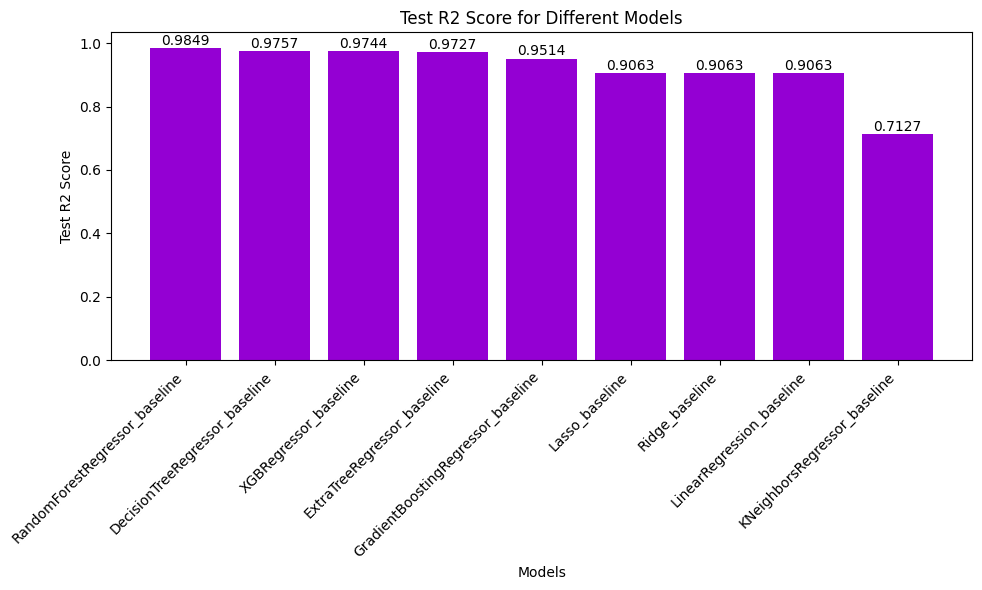

In [91]:
# create a bar plot for Test_R2 metric
plt.figure(figsize=(10, 6))
plt.bar(result_base.index, result_base['Test_R2'], color = 'darkviolet')
plt.xlabel('Models')
plt.ylabel('Test R2 Score')
plt.title('Test R2 Score for Different Models')

# add R2 values above each bar
for i, v in enumerate(result_base['Test_R2']):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Feature importance of all trained models

In [75]:
rankings_base = ml_model.feature_importances_.tolist()

In [115]:
importance_base = pd.DataFrame(sorted(zip(X_train_base.columns, rankings_base),
                                 reverse=True), columns=["feature","importance"]).sort_values("importance", ascending = False)

importance_base

,feature,importance
2,flight_class,0.880106
3,duration,0.056727
6,days_left,0.018205
8,airline,0.010727
1,source_city,0.010167
4,destination_city,0.009871
7,arrival_time,0.005356
5,departure_time,0.005262
0,stops,0.003579


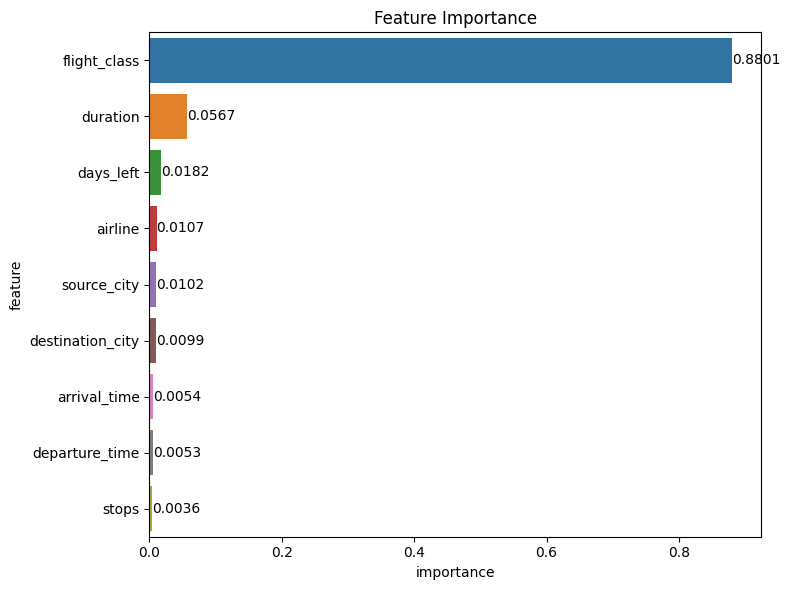

In [116]:
plt.figure(figsize=(8, 6))
sns.barplot(x="importance",
            y="feature",
            data=importance_base[:9])

# add R2 values above each bar
for i, v in enumerate(importance_base['importance'][:9]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Feature Importance')
plt.tight_layout()

#### Baseline regression models with default hyperparameters and feature normalization using **MinMaxScaler**

This segment provides a comparative analysis of regression models with default hyperparameters and feature normalization using MinMaxScaler. It evaluates the models' performance and visualizes feature importance, offering insights into model effectiveness and feature contributions.


1. Data Preparation.
The DataFrame df_encoded_MinMaxScaler is split into features (X_MinMaxScaler) and the target (y_MinMaxScaler), where the 'price' column is dropped from features.
2. Splitting Data.
The transformed data is split into training and testing sets (X_train_MinMaxScaler, X_test_MinMaxScaler, y_train_MinMaxScaler, y_test_MinMaxScaler) using a test size of 20% and a random state of 42.
3. Model Initialization.
Several regression models are initialized with specific random states, including Linear Regression, Ridge Regression, Lasso Regression, K-Nearest Neighbors, Random Forest, XGBoost, Decision Tree, Gradient Boosting, and Extra Tree.
4. Model Evaluation.
Each model is trained on the training data and evaluated on both training and testing sets.
Performance metrics such as training score, test score, RMSE, MAE, and R2 score are calculated for each model.
The results are stored in the result_MinMaxScaler DataFrame.
5. Visualization.
A bar plot is created to visualize the Test R2 score for different models.
Another bar plot is generated to display the feature importance for the last trained model with normalized features.
Only the top 9 features with the highest importance are shown on the plot.

In [28]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X_MinMaxScaler = df_encoded_MinMaxScaler.drop(columns='price')     # features

y_MinMaxScaler = df_encoded_MinMaxScaler['price']   # target

In [29]:
# check features
X_MinMaxScaler.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,0.8,0.4,0.4,0.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.4,0.2,0.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.4,0.2,0.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.4,0.8,0.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.4,0.8,0.0,0.8,1.0,1.0,0.030612,0.0


In [30]:
# check target
y_MinMaxScaler.head(5)

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [31]:
# split the transformed data into training and testing sets for MinMaxScalered Dataset
X_train_MinMaxScaler, X_test_MinMaxScaler, y_train_MinMaxScaler, y_test_MinMaxScaler = train_test_split(X_MinMaxScaler,
                                                                         y_MinMaxScaler, test_size=0.2, random_state=42)

##### Training

In [32]:
# initialize regression models with specific random states
lm_MinMaxScaler = LinearRegression()
ridge_MinMaxScaler = Ridge(random_state = 42)
lasso_MinMaxScaler = Lasso(random_state = 42)
knn_MinMaxScaler = KNeighborsRegressor()
rf_MinMaxScaler = RandomForestRegressor(random_state = 42)
xgbt_MinMaxScaler = xgb.XGBRegressor(random_state = 42)
dtree_MinMaxScaler = DecisionTreeRegressor(random_state = 42)
gbr_MinMaxScaler =  GradientBoostingRegressor(random_state = 42)
etr_MinMaxScaler = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo_MinMaxScaler = [xgbt_MinMaxScaler, lm_MinMaxScaler, ridge_MinMaxScaler, lasso_MinMaxScaler,
                      knn_MinMaxScaler, rf_MinMaxScaler, dtree_MinMaxScaler, gbr_MinMaxScaler, etr_MinMaxScaler]

result_MinMaxScaler = []

for i in algo_MinMaxScaler:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train_MinMaxScaler,y_train_MinMaxScaler)
        
        result_MinMaxScaler.append([str(i).split("(")[0] + str("_MinMaxScaler"), ml_model.score(X_train_MinMaxScaler, y_train_MinMaxScaler),
                                     ml_model.score(X_test_MinMaxScaler, y_test_MinMaxScaler),
                  np.sqrt(mean_squared_error(y_train_MinMaxScaler, ml_model.predict(X_train_MinMaxScaler))),
                  np.sqrt(mean_squared_error(y_test_MinMaxScaler, ml_model.predict(X_test_MinMaxScaler))),
                  mean_absolute_error(y_train_MinMaxScaler, ml_model.predict(X_train_MinMaxScaler)),
                  mean_absolute_error(y_test_MinMaxScaler, ml_model.predict(X_test_MinMaxScaler)),
                  r2_score(y_train_MinMaxScaler, ml_model.predict(X_train_MinMaxScaler)),
                  r2_score(y_test_MinMaxScaler, ml_model.predict(X_test_MinMaxScaler))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result_MinMaxScaler = pd.DataFrame(result_MinMaxScaler, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae", "Train_R2",
                                         "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result_MinMaxScaler

XGBRegressor  ✓	 16.828 sec
LinearRegression  ✓	 1.109 sec
Ridge  ✓	 0.094 sec
Lasso  ✓	 0.125 sec
KNeighborsRegressor  ✓	 112.266 sec
RandomForestRegressor  ✓	 101.062 sec
DecisionTreeRegressor  ✓	 1.375 sec
GradientBoostingRegressor  ✓	 21.188 sec
ExtraTreeRegressor  ✓	 0.969 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
RandomForestRegressor_MinMaxScaler,0.997492,0.984897,1136.626069,2790.182885,423.609301,1090.424417,0.997492,0.984897
DecisionTreeRegressor_MinMaxScaler,0.999287,0.975525,606.204225,3551.990218,58.314965,1174.004106,0.999287,0.975525
XGBRegressor_MinMaxScaler,0.976325,0.974401,3492.190242,3632.580182,2012.171701,2075.547171,0.976325,0.974401
ExtraTreeRegressor_MinMaxScaler,0.999279,0.972749,609.356434,3747.961816,58.798044,1342.097389,0.999279,0.972749
KNeighborsRegressor_MinMaxScaler,0.982094,0.971521,3037.004901,3831.494479,1475.743096,1890.893732,0.982094,0.971521
GradientBoostingRegressor_MinMaxScaler,0.952134,0.951361,4965.536000,5007.224206,2969.662670,2974.346659,0.952134,0.951361
Lasso_MinMaxScaler,0.906391,0.906273,6943.995437,6950.879626,4550.350316,4525.382622,0.906391,0.906273
Ridge_MinMaxScaler,0.906391,0.906272,6943.987954,6950.897155,4552.068351,4527.121027,0.906391,0.906272
LinearRegression_MinMaxScaler,0.906391,0.906272,6943.987936,6950.899049,4552.100716,4527.154960,0.906391,0.906272


##### Graphics for R2 scores of different trained models

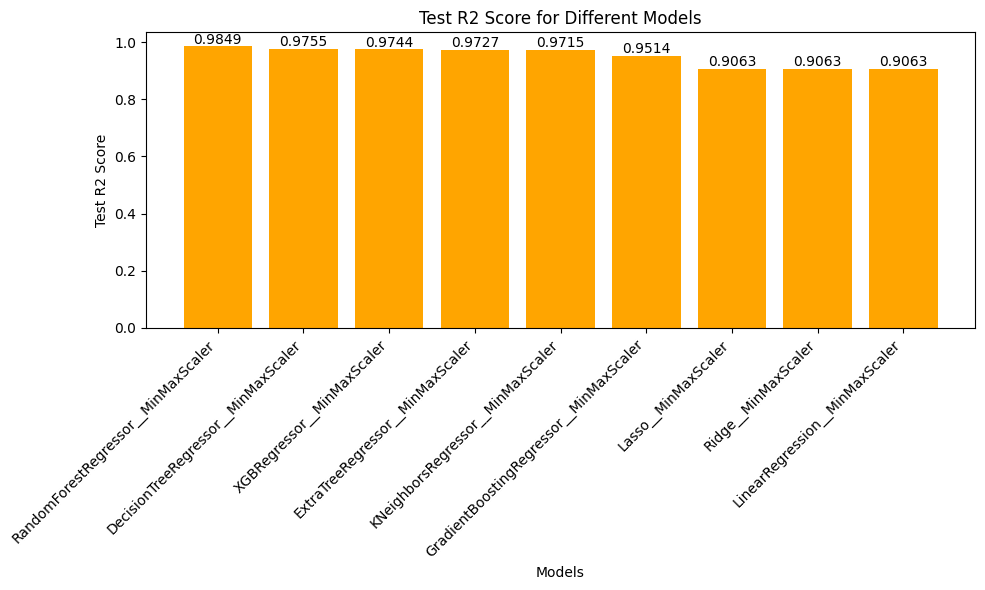

In [85]:
# create a bar plot for Test_R2 metric
plt.figure(figsize=(10, 6))
plt.bar(result_MinMaxScaler.index, result_MinMaxScaler['Test_R2'], color = 'orange')
plt.xlabel('Models')
plt.ylabel('Test R2 Score')
plt.title('Test R2 Score for Different Models')

# add R2 values above each bar
for i, v in enumerate(result_MinMaxScaler['Test_R2']):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Feature importance of all trained models

In [108]:
# calculate feature importances for the last trained model with normalized features using MinMaxScaler
rankings_MinMaxScaler = ml_model.feature_importances_.tolist()

# create a DataFrame to store feature importances
importance_MinMaxScaler = pd.DataFrame(sorted(zip(X_train_MinMaxScaler.columns,rankings_MinMaxScaler),
                                 reverse=True),columns=["feature","importance"]).sort_values("importance",ascending = False)

In [109]:
# plain list
importance_MinMaxScaler

,feature,importance
2,flight_class,0.880106
3,duration,0.056727
6,days_left,0.018205
8,airline,0.010727
1,source_city,0.010167
4,destination_city,0.009871
7,arrival_time,0.005356
5,departure_time,0.005262
0,stops,0.003579


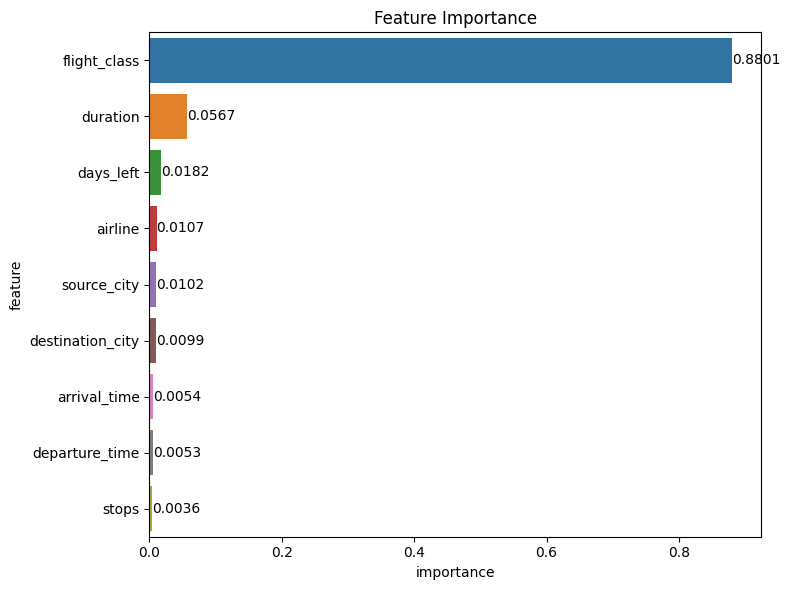

In [114]:
plt.figure(figsize=(8, 6))
sns.barplot(x="importance",
            y="feature",
            data=importance_MinMaxScaler[:9])

# add R2 values above each bar
for i, v in enumerate(importance_MinMaxScaler['importance'][:9]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Feature Importance')
plt.tight_layout()

#### Baseline regression models with default hyperparameters and feature standardization using **StandardScaler**

This segment provides an analysis of regression models with default hyperparameters and feature normalization using StandardScaler. It evaluates the models' performance and visualizes feature importance, offering insights into model effectiveness and feature contributions.


1. Data Preparation.
The DataFrame df_encoded_StandardScaler is split into features (X_StandardScaler) and the target (y_StandardScaler), where the 'price' column is dropped from features.

2. Splitting Data.
The transformed data is split into training and testing sets (X_train_StandardScaler, X_test_StandardScaler, y_train_StandardScaler, y_test_StandardScaler) using a test size of 20% and a random state of 42.
3. Model Initialization.

Several regression models are initialized with specific random states, including Linear Regression, Ridge Regression, Lasso Regression, K-Nearest Neighbors, Random Forest, XGBoost, Decision Tree, Gradient Boosting, and Extra Tree.
4. Model Evaluation.

Each model is trained on the training data and evaluated on both training and testing sets.
Performance metrics such as training score, test score, RMSE, MAE, and R2 score are calculated for each model.
The results are stored in the result_StandardScaler DataFrame.
5. Visualization.

A bar plot is created to visualize the Test R2 score for different models.
Another bar plot is generated to display the feature importance for the last trained model with normalized features using StandardScaler.
Only the top 9 features with the highest importance are shown on the plot.

In [33]:
# split the DataFrame into features (X_StandardScaler) and target (y_StandardScaler)
X_StandardScaler = df_encoded_StandardScaler.drop(columns='price')     # features

y_StandardScaler = df_encoded_StandardScaler['price']   # target

In [34]:
# check features
X_StandardScaler.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left
0,0.488270,-0.329721,-0.237897,-2.321779,1.105790,1.382425,0.672576,-1.397531,-1.843875
1,0.488270,-0.329721,-0.807934,-2.321779,0.531627,1.382425,0.672576,-1.375284,-1.843875
2,-1.693633,-0.329721,-0.807934,-2.321779,-1.190865,1.382425,0.672576,-1.397531,-1.843875
3,1.033746,-0.329721,0.902176,-2.321779,-1.765028,1.382425,0.672576,-1.386407,-1.843875
4,1.033746,-0.329721,0.902176,-2.321779,0.531627,1.382425,0.672576,-1.375284,-1.843875


In [35]:
# check target
y_StandardScaler.head(5)

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [36]:
# split the transformed data into training and testing sets
X_train_StandardScaler, X_test_StandardScaler, y_train_StandardScaler, y_test_StandardScaler = train_test_split(X_StandardScaler,
                                                                                                 y_StandardScaler, test_size=0.2, random_state=42)

##### Training

In [37]:
# initialize regression models with specific random states
lm_StandardScaler = LinearRegression()
ridge_StandardScaler = Ridge(random_state = 42)
lasso_StandardScaler = Lasso(random_state = 42)
knn_StandardScaler = KNeighborsRegressor()
rf_StandardScaler = RandomForestRegressor(random_state = 42)
xgbt_StandardScaler = xgb.XGBRegressor(random_state = 42)
dtree_StandardScaler = DecisionTreeRegressor(random_state = 42)
gbr_StandardScaler =  GradientBoostingRegressor(random_state = 42)
etr_StandardScaler = ExtraTreeRegressor(random_state = 42)

# list of all regression models
algo_StandardScaler = [xgbt_StandardScaler, lm_StandardScaler, ridge_StandardScaler,
                       lasso_StandardScaler, knn_StandardScaler, rf_StandardScaler, 
                       dtree_StandardScaler, gbr_StandardScaler, etr_StandardScaler]

result_StandardScaler = []

for i in algo_StandardScaler:
        start = time.process_time()
        # fit the model on the training data and calculate performance metrics
        ml_model = i.fit(X_train_StandardScaler,y_train_StandardScaler)
        
        result_StandardScaler.append([str(i).split("(")[0] + str("_StandardScaler"), ml_model.score(X_train_StandardScaler, 
                                                        y_train_StandardScaler), ml_model.score(X_test_StandardScaler, y_test_StandardScaler),
                  np.sqrt(mean_squared_error(y_train_StandardScaler, ml_model.predict(X_train_StandardScaler))),
                  np.sqrt(mean_squared_error(y_test_StandardScaler, ml_model.predict(X_test_StandardScaler))),
                  mean_absolute_error(y_train_StandardScaler, ml_model.predict(X_train_StandardScaler)),
                  mean_absolute_error(y_test_StandardScaler, ml_model.predict(X_test_StandardScaler)),
                  r2_score(y_train_StandardScaler, ml_model.predict(X_train_StandardScaler)),
                  r2_score(y_test_StandardScaler, ml_model.predict(X_test_StandardScaler))]),
        print(str(i).split("(")[0]," ✓\t", "{}".format(round(time.process_time()-start,3)),"sec")

# create DataFrame from the result list and set the index as Algorithm
result_StandardScaler = pd.DataFrame(result_StandardScaler, columns = ["Algorithm", "Train_Score",
                                         "Test_Score", "Train_Rmse", "Test_Rmse", "Train_Mae",
                                         "Test_Mae", "Train_R2", "Test_R2"]).sort_values("Test_Rmse").set_index("Algorithm")
result_StandardScaler

XGBRegressor  ✓	 15.406 sec
LinearRegression  ✓	 1.094 sec
Ridge  ✓	 0.141 sec
Lasso  ✓	 0.156 sec
KNeighborsRegressor  ✓	 133.672 sec
RandomForestRegressor  ✓	 99.422 sec
DecisionTreeRegressor  ✓	 1.406 sec
GradientBoostingRegressor  ✓	 21.859 sec
ExtraTreeRegressor  ✓	 1.141 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae,Train_R2,Test_R2
Algorithm,,,,,,,,
RandomForestRegressor_StandardScaler,0.997489,0.984898,1137.344829,2790.100617,424.751383,1093.746079,0.997489,0.984898
DecisionTreeRegressor_StandardScaler,0.999287,0.975538,606.204225,3551.020239,58.314965,1178.934559,0.999287,0.975538
XGBRegressor_StandardScaler,0.976325,0.974401,3492.190242,3632.580182,2012.171701,2075.547171,0.976325,0.974401
KNeighborsRegressor_StandardScaler,0.983448,0.973593,2919.980151,3689.456087,1393.590159,1789.517556,0.983448,0.973593
ExtraTreeRegressor_StandardScaler,0.999279,0.972749,609.356434,3747.961816,58.798044,1342.097389,0.999279,0.972749
GradientBoostingRegressor_StandardScaler,0.952134,0.951361,4965.536000,5007.224206,2969.662670,2974.346659,0.952134,0.951361
Lasso_StandardScaler,0.906391,0.906272,6943.988524,6950.895094,4551.701487,4526.742239,0.906391,0.906272
Ridge_StandardScaler,0.906391,0.906272,6943.987937,6950.898864,4552.105029,4527.158831,0.906391,0.906272
LinearRegression_StandardScaler,0.906391,0.906272,6943.987936,6950.899049,4552.100716,4527.154960,0.906391,0.906272


##### Graphics for R2 scores of different trained models

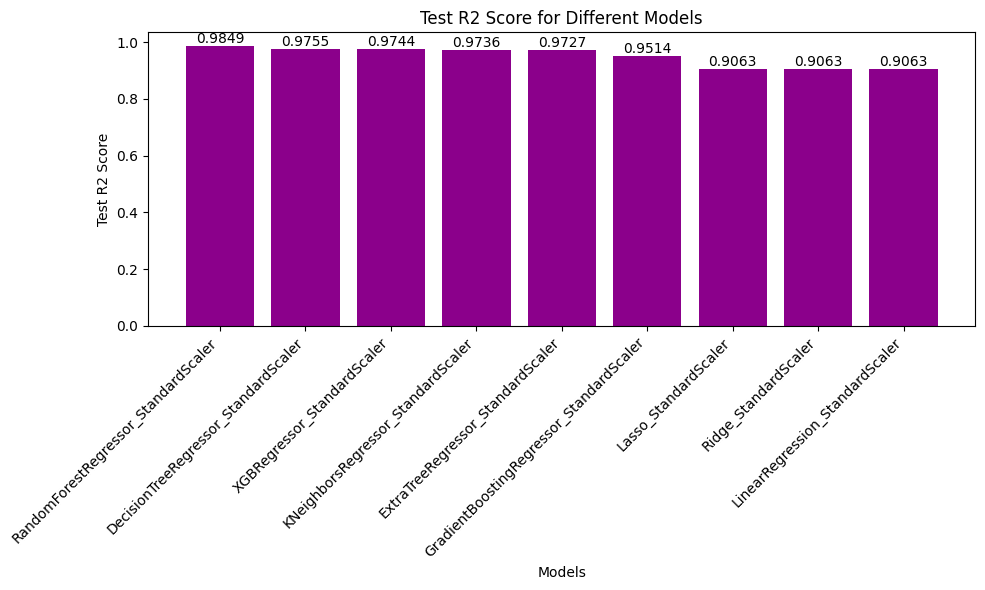

In [26]:
# create a bar plot for Test_R2 metric
plt.figure(figsize=(10, 6))
plt.bar(result_StandardScaler.index, result_StandardScaler['Test_R2'], color = 'darkmagenta')
plt.xlabel('Models')
plt.ylabel('Test R2 Score')
plt.title('Test R2 Score for Different Models')

# add R2 values above each bar
for i, v in enumerate(result_StandardScaler['Test_R2']):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Feature importance of all trained models

In [27]:
# calculate feature importances for the last trained model with normalized features using StandardScaler
rankings_StandardScaler = ml_model.feature_importances_.tolist()

# create a DataFrame to store feature importances
importance_StandardScaler = pd.DataFrame(sorted(zip(X_train_StandardScaler.columns, rankings_StandardScaler),
                                 reverse=True),columns=["feature","importance"]).sort_values("importance",ascending = False)

In [28]:
# plain list
importance_StandardScaler

,feature,importance
2,flight_class,0.880106
3,duration,0.056727
6,days_left,0.018205
8,airline,0.010727
1,source_city,0.010167
4,destination_city,0.009871
7,arrival_time,0.005356
5,departure_time,0.005262
0,stops,0.003579


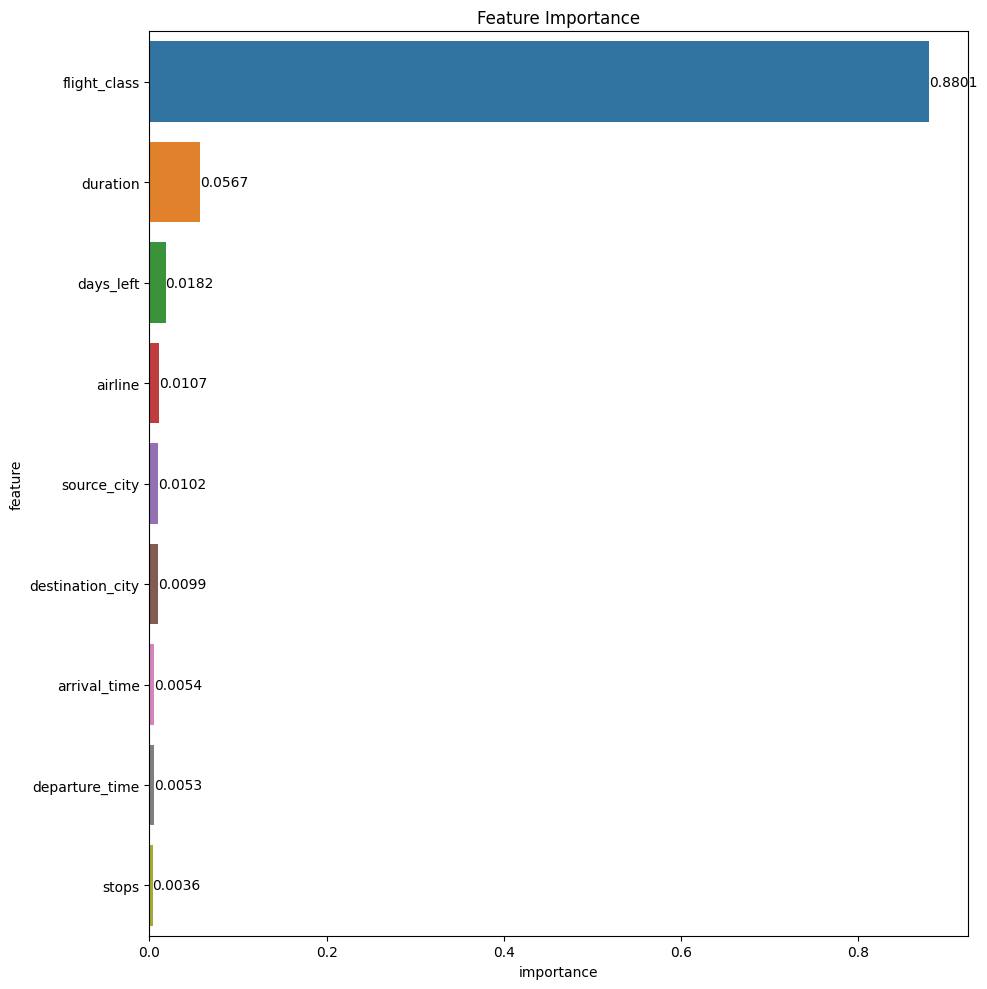

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="feature",
            data=importance_StandardScaler[:9])

# add R2 values above each bar
for i, v in enumerate(importance_StandardScaler['importance'][:9]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Feature Importance')
plt.tight_layout()

### Comparison of R2 Metrics for Regression Model Variations

In this section of the code, R2 metrics for different modifications of the best three regression models (**RandomForestRegressor**, **DecisionTreeRegressor**, and **XGBRegressor**) are compared and visualized using bar plots.

For each model, R2 scores are collected for three variations: baseline, MinMaxScaler normalization, and StandardScaler normalization. The R2 scores for each variation are appended to separate lists (rf_list_r2, dtree_list_r2, xgb_list_r2) for RandomForestRegressor, DecisionTreeRegressor, and XGBRegressor, respectively.

These lists are then used to create DataFrames (df_model) where each row corresponds to a model variation, and the R2 scores are stored.

For each model, a bar plot is generated using Seaborn's sns.barplot() function. The x-axis represents the different model variations, and the y-axis represents the R2 scores. R2 scores are displayed above each bar for better visibility using the plt.text() function.

Lastly, the y-axis limits are adjusted for each plot to enhance visibility. The plots are displayed using plt.show().

This section effectively compares the performance of different variations of the specified regression models based on their R2 metrics.

##### Comparation of different **RandomForestRegressor** models

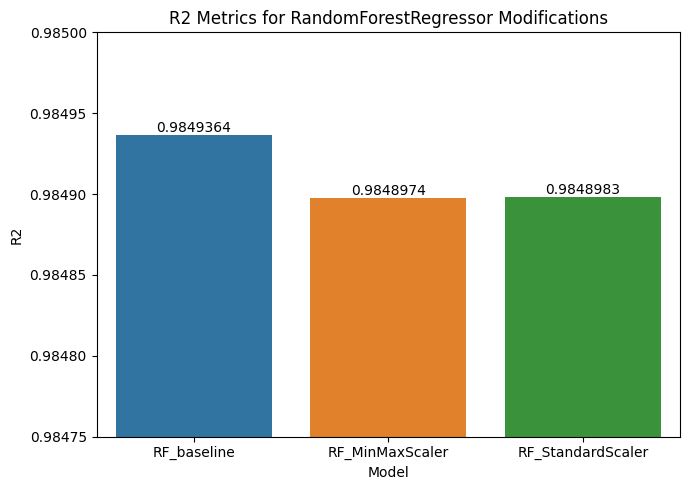

In [38]:
# list of models and their r2 metric results 
rf_list_r2 = []
rf_list_r2.append(result_base.loc['RandomForestRegressor_baseline', 'Test_R2'])
rf_list_r2.append(result_MinMaxScaler.loc['RandomForestRegressor_MinMaxScaler', 'Test_R2'])
rf_list_r2.append(result_StandardScaler.loc['RandomForestRegressor_StandardScaler', 'Test_R2'])

# create a DataFrame
df_model = pd.DataFrame({
    'Model': ['RF_baseline', 'RF_MinMaxScaler', 'RF_StandardScaler'],
    'R2': rf_list_r2
})

# plotting
plt.figure(figsize=(7, 5))
sns.barplot(x="Model",
            y="R2",
            data=df_model)

# add R2 values above each bar
for i, v in enumerate(df_model['R2']):
    plt.text(i, v, f'{v:.7f}', ha='center', va='bottom', color='black')

plt.title('R2 Metrics for RandomForestRegressor Modifications')
plt.ylim(0.98475, 0.9850)  # adjust the y-axis limits for better visibility
plt.tight_layout()
plt.show()

##### Comparation of different **DecisionTreeRegressor** models

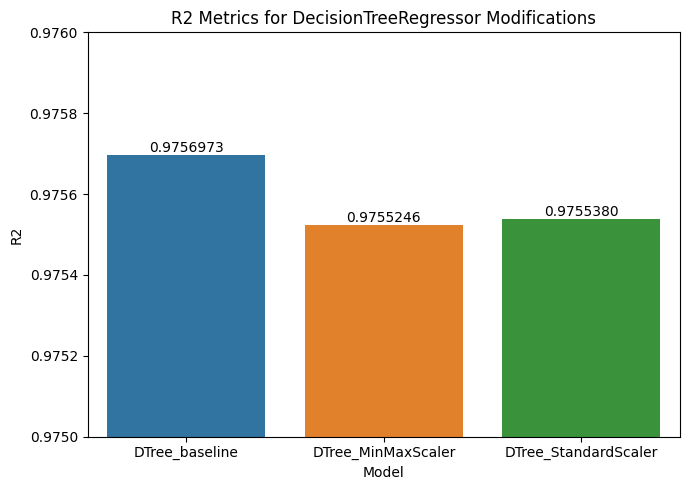

In [168]:
# list of models and their r2 metric results 
dtree_list_r2 = []
dtree_list_r2.append(result_base.loc['DecisionTreeRegressor_baseline', 'Test_R2'])
dtree_list_r2.append(result_MinMaxScaler.loc['DecisionTreeRegressor_MinMaxScaler', 'Test_R2'])
dtree_list_r2.append(result_StandardScaler.loc['DecisionTreeRegressor_StandardScaler', 'Test_R2'])

# create a DataFrame
df_model = pd.DataFrame({
    'Model': ['DTree_baseline', 'DTree_MinMaxScaler', 'DTree_StandardScaler'],
    'R2': dtree_list_r2
})

# plotting
plt.figure(figsize=(7, 5))
sns.barplot(x="Model",
            y="R2",
            data=df_model)

# add R2 values above each bar
for i, v in enumerate(df_model['R2']):
    plt.text(i, v, f'{v:.7f}', ha='center', va='bottom', color='black')

plt.title('R2 Metrics for DecisionTreeRegressor Modifications')
plt.ylim(0.975, 0.976)  # adjust the y-axis limits for better visibility
plt.tight_layout()
plt.show()

##### Comparation of different **XGBRegressor** models

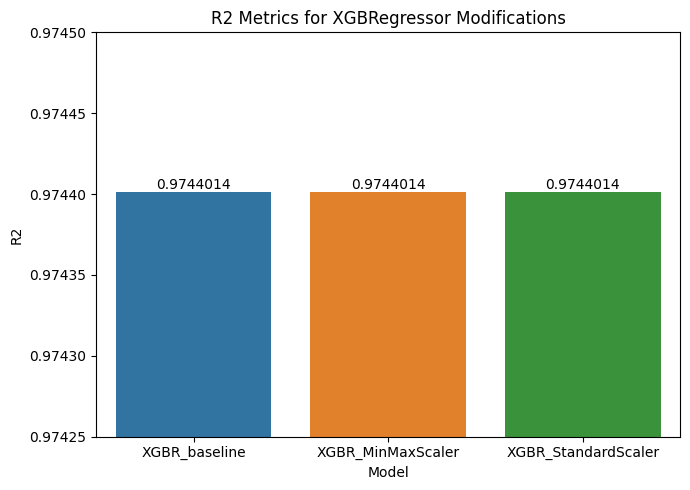

In [172]:
# list of models and their r2 metric results 
xgb_list_r2 = []
xgb_list_r2.append(result_base.loc['XGBRegressor_baseline', 'Test_R2'])
xgb_list_r2.append(result_MinMaxScaler.loc['XGBRegressor_MinMaxScaler', 'Test_R2'])
xgb_list_r2.append(result_StandardScaler.loc['XGBRegressor_StandardScaler', 'Test_R2'])

# create a DataFrame
df_model = pd.DataFrame({
    'Model': ['XGBR_baseline', 'XGBR_MinMaxScaler', 'XGBR_StandardScaler'],
    'R2': xgb_list_r2
})

# plotting
plt.figure(figsize=(7, 5))
sns.barplot(x="Model",
            y="R2",
            data=df_model)

# add R2 values above each bar
for i, v in enumerate(df_model['R2']):
    plt.text(i, v, f'{v:.7f}', ha='center', va='bottom', color='black')

plt.title('R2 Metrics for XGBRegressor Modifications')
plt.ylim(0.97425, 0.9745)  # adjust the y-axis limits for better visibility
plt.tight_layout()
plt.show()

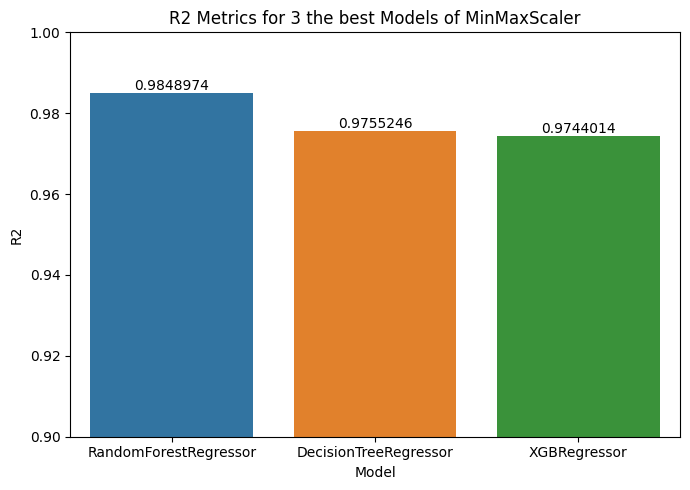

In [41]:
# list of models and their r2 metric results 
m_list_r2 = []
m_list_r2.append(result_MinMaxScaler.loc['RandomForestRegressor_MinMaxScaler', 'Test_R2'])
m_list_r2.append(result_MinMaxScaler.loc['DecisionTreeRegressor_MinMaxScaler', 'Test_R2'])
m_list_r2.append(result_MinMaxScaler.loc['XGBRegressor_MinMaxScaler', 'Test_R2'])

# create a DataFrame
df_model = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'DecisionTreeRegressor', 'XGBRegressor'],
    'R2': m_list_r2
})

# plotting
plt.figure(figsize=(7, 5))
sns.barplot(x="Model",
            y="R2",
            data=df_model)

# add R2 values above each bar
for i, v in enumerate(df_model['R2']):
    plt.text(i, v, f'{v:.7f}', ha='center', va='bottom', color='black')

plt.title('R2 Metrics for 3 the best Models of MinMaxScaler')
plt.ylim(0.9, 1.0)  # adjust the y-axis limits for better visibility
plt.tight_layout()
plt.show()

### Final model choice

In [42]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

rf = RandomForestRegressor(random_state = 42).fit(X_train,Y_train)

Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)


# calculating metrics
score_train = rf.score(X_train, Y_train)
score_test = rf.score(X_test, Y_test)

mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)


# function to format score_train in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train), mse_train, mae_train, r2_train],
    'Test Data': [format_score(score_test), mse_test, mae_test, r2_test]
})

print(metrics_df)

  Metric      Train Data       Test Data
0  Score        0.997480        0.985442
1    MSE  1300524.143869  7443877.717255
2    MAE      424.359604     1075.146718
3     R2         0.99748        0.985442


#### Scatter plot of predicted values versus residuals (the difference between predicted and actual values) for both the training and test data sets

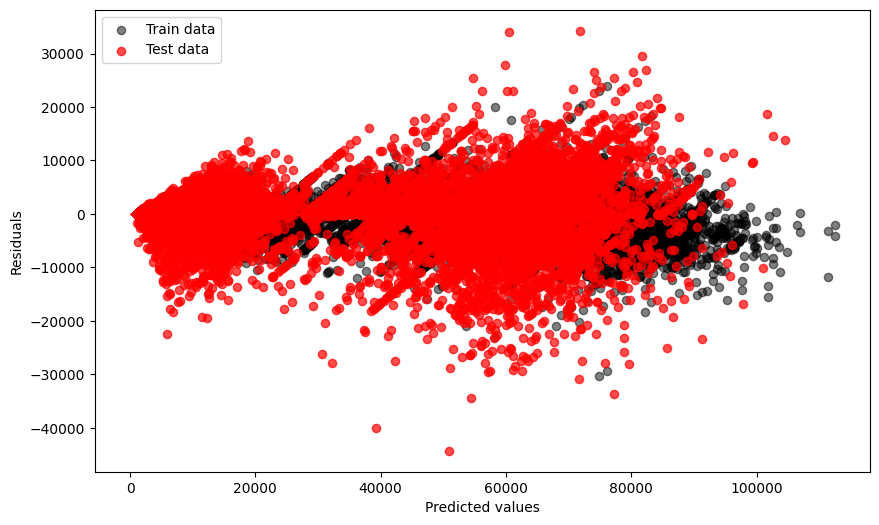

In [18]:
# set the figure size
plt.figure(figsize=(10,6))

# plot the residuals for the training data
plt.scatter(Y_train_pred, Y_train_pred - Y_train,
            c='black', marker='o', s=35, alpha=0.5,
            label='Train data')

# plot the residuals for the test data
plt.scatter(Y_test_pred, Y_test_pred - Y_test,
            c='red', marker='o', s=35, alpha=0.7,
            label='Test data')

# label the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# add a legend
plt.legend(loc='upper left')

# add a horizontal line at y=0 for reference
plt.hlines(y=0, xmin=0, xmax=60000, lw=2, color='red')

# show the plot
plt.show()

##### Feature importance for Gradient Boosting Regressor

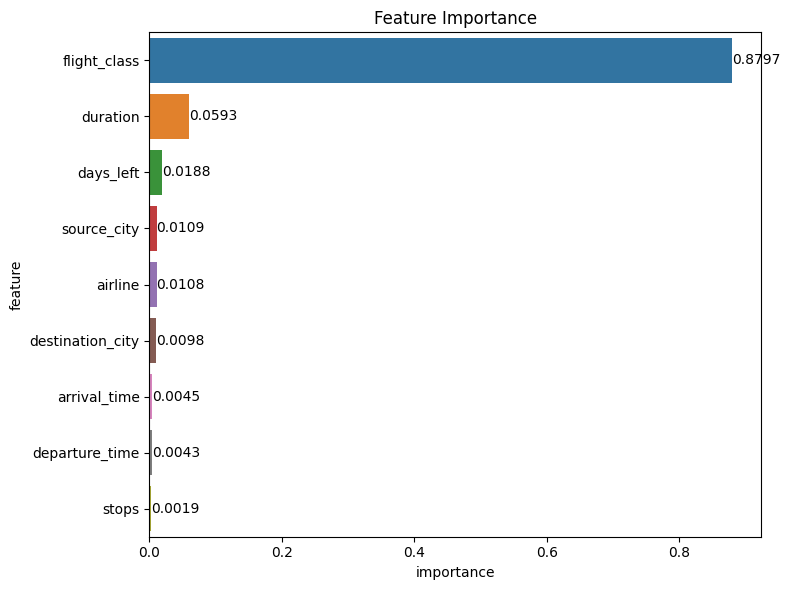

In [20]:
rankings = rf.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),
                                 reverse=True), columns=["feature", "importance"]).sort_values("importance", ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="feature",
            data=importance[:9])

# add R2 values above each bar
for i, v in enumerate(importance['importance'][:9]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Feature Importance')
plt.tight_layout()

### Searching for the best size of the test dataset

In this section, there is aim to determine the optimal size for the test dataset by iterating through different test sizes and evaluating the performance metrics of the models.


#### Searching for the test size for **RandomForestRegressor**
Start by searching for the best test size for the RandomForestRegressor model. The loop iterates through a range of test sizes and evaluates the performance of the model using mean squared error (MSE) and R2 score. The best test size, along with the corresponding R2 score and MSE, is printed. Additionally, the time taken to search for the best test size is displayed. Finally, the results are visualized using plots for R2 score and MSE.

Best test_size : 0.43
Best R2 Score : 0.9974018338764383
Best Mean Squared Error : 1341191.9480446563
Time elapsed: 824.0433158874512 seconds


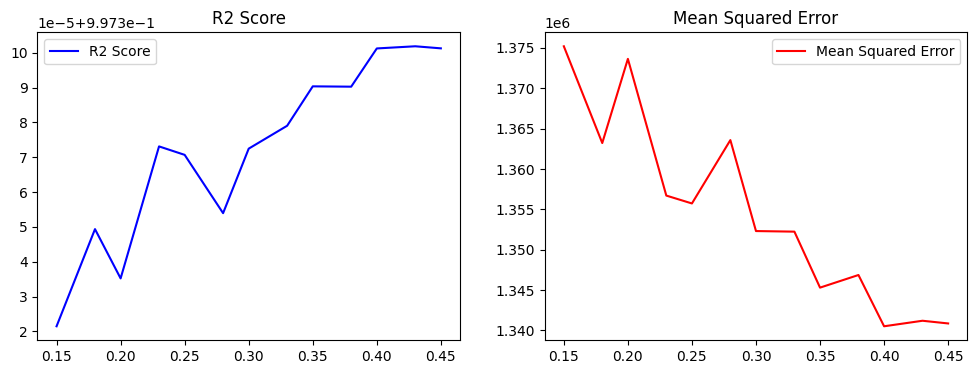

In [64]:
# create a loop to find best test_size
test_list_rf = []
mse_list_rf = []
r2score_list_rf = []
best_r2_rf = 0
best_mse_rf = 0
best_test_rf = 0

# start timing
start_time = time.time()

for tester in range(6, 19):
    tester = round(0.025 * tester, 2)  # convert tester to test size
    test_list_rf.append(tester)
    # split data
    X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, Y, test_size=tester, random_state=42)
    # fit random forest model and make predictions
    rf = RandomForestRegressor().fit(X, Y)  
    y_pred_rf = rf.predict(X_test_rf)  
    r2score_rf = r2_score(y_test_rf, y_pred_rf)
    r2score_list_rf.append(r2score_rf)
    mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
    mse_list_rf.append(mse_rf) 
    # update best R2 Score and associated values if a better R2 Score is found
    if r2score_rf > best_r2_rf:
        best_r2_rf = r2score_rf
        best_mse_rf = mse_rf
        best_test_rf = tester

# show the best test size, best R2 Score, and best Mean Squared Error
print(colored('Best test_size : {}'.format(best_test_rf), 'light_green'))
print(colored('Best R2 Score : {}'.format(best_r2_rf), 'light_green'))
print(colored('Best Mean Squared Error : {}'.format(best_mse_rf), 'light_green'))

# end timing
end_time = time.time()
elapsed_time_rf = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_rf), 'light_green'))

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list_rf, r2score_list_rf, c='blue', label='R2 Score')
ax[0].set_title("R2 Score")
ax[0].legend()

ax[1].plot(test_list_rf, mse_list_rf, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

#### Searching for the test size for **DecisionTreeRegressor**
Next, repeating the same process to find the optimal test size for the DecisionTreeRegressor model. Similarly, the loop iterates through different test sizes, evaluates model performance, prints the best test size, R2 score, MSE, and the time taken for the search. 

Plots are generated to visualize the R2 score and MSE.

Best test_size : 0.25
Best R2 Score : 0.9991289252496197
Best Mean Squared Error : 449141.8333318526
Time elapsed: 13.006270170211792 seconds


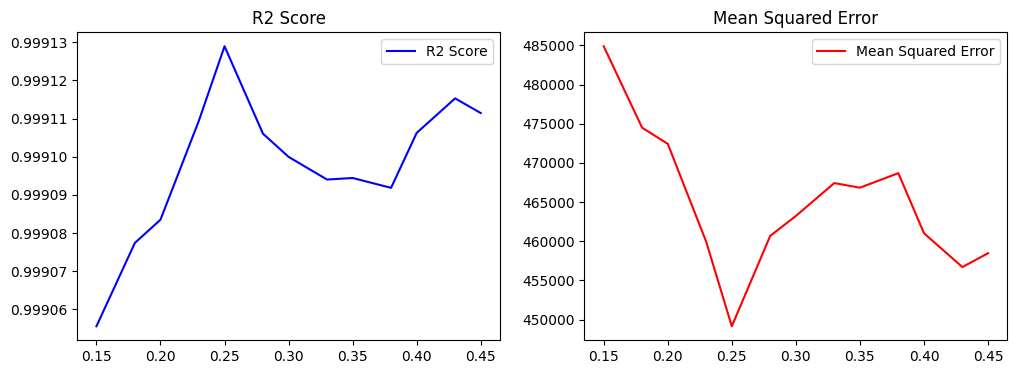

In [62]:
# create a loop to find best test_size
test_list_dtree = []
mse_list_dtree = []
r2score_list_dtree = []
best_r2_dtree = 0
best_mse_dtree = 0
best_test_dtree = 0

# start timing
start_time = time.time()

for tester in range(6, 19):
    tester = round(0.025 * tester, 2)  # convert tester to test size
    test_list_dtree.append(tester)
    # split data
    X_train_dtree, X_test_dtree, y_train_dtree, y_test_dtree = train_test_split(X, Y, test_size=tester, random_state=42)
    # fit decision tree model and make predictions
    dtree = DecisionTreeRegressor().fit(X, Y)  
    y_pred_dtree = dtree.predict(X_test_dtree)  
    r2score_dtree = r2_score(y_test_dtree, y_pred_dtree)
    r2score_list_dtree.append(r2score_dtree)
    mse_dtree = mean_squared_error(y_test_dtree, y_pred_dtree)
    mse_list_dtree.append(mse_dtree) 
    # update best R2 Score and associated values if a better R2 Score is found
    if r2score_dtree > best_r2_dtree:
        best_r2_dtree = r2score_dtree
        best_mse_dtree = mse_dtree
        best_test_dtree = tester

# show the best test size, best R2 Score, and best Mean Squared Error
print(colored('Best test_size : {}'.format(best_test_dtree), 'yellow'))
print(colored('Best R2 Score : {}'.format(best_r2_dtree), 'yellow'))
print(colored('Best Mean Squared Error : {}'.format(best_mse_dtree), 'yellow'))

# end timing
end_time = time.time()
elapsed_time_dtree = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_dtree), 'yellow'))

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list_dtree, r2score_list_dtree, c='blue', label='R2 Score')
ax[0].set_title("R2 Score")
ax[0].legend()

ax[1].plot(test_list_dtree, mse_list_dtree, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

#### Searching for the test size for **XGBRegressor**
Finally, searching for the best test size for the XGBRegressor model. The loop iterates through various test sizes, evaluates model performance, prints the best test size, R2 score, MSE, and the time

Best test_size : 0.3
Best R2 Score : 0.9759390172383726
Best Mean Squared Error : 12383381.826031743
Time elapsed: 12.576087951660156 seconds


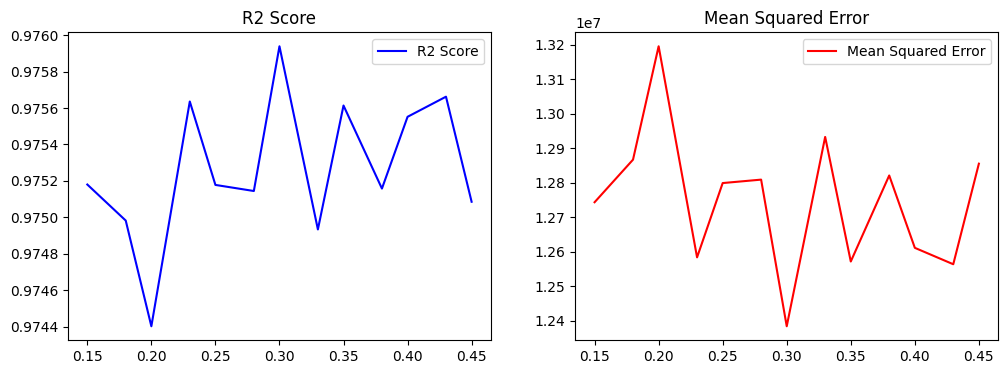

In [63]:
# create a loop to find best test_size
test_list_xgb = []
mse_list_xgb = []
r2score_list_xgb = []
best_r2_xgb = 0
best_mse_xgb = 0
best_test_xgb = 0

# start timing
start_time = time.time()

for tester in range(6, 19):
    tester = round(0.025 * tester, 2)  # convert tester to test size
    test_list_xgb.append(tester)
    # split data
    X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, Y, test_size=tester, random_state=42)
    # fit XGBoost model and make predictions
    xgb_model = xgb.XGBRegressor()  # instantiate XGBRegressor directly
    xgb_model.fit(X_train_xgb, y_train_xgb)  # fit the model
    y_pred_xgb = xgb_model.predict(X_test_xgb)  # make predictions
    r2score_xgb = r2_score(y_test_xgb, y_pred_xgb)
    r2score_list_xgb.append(r2score_xgb)
    mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
    mse_list_xgb.append(mse_xgb)
    # update best R2 Score and associated values if a better R2 Score is found
    if r2score_xgb > best_r2_xgb:
        best_r2_xgb = r2score_xgb
        best_mse_xgb = mse_xgb
        best_test_xgb = tester

# show the best test size, best R2 Score, and best Mean Squared Error
print(colored('Best test_size : {}'.format(best_test_xgb), 'light_blue'))
print(colored('Best R2 Score : {}'.format(best_r2_xgb), 'light_blue'))
print(colored('Best Mean Squared Error : {}'.format(best_mse_xgb), 'light_blue'))

# end timing
end_time = time.time()
elapsed_time_xgb = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_xgb), 'light_blue'))

# plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(test_list_xgb, r2score_list_xgb, c='blue', label='R2 Score')
ax[0].set_title("R2 Score")
ax[0].legend()

ax[1].plot(test_list_xgb, mse_list_xgb, c='red', label='Mean Squared Error')
ax[1].set_title("Mean Squared Error")
ax[1].legend()
plt.show()

### Cross-validation technics

#### K-fold validation
When evaluating different settings (“hyperparameters”) for estimators, such as the CV setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “validation set”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets.

A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

In [21]:
# perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# initialize lists to store evaluation metrics
train_scores = []
test_scores = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    rf = RandomForestRegressor(random_state=42).fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)

    # calculating metrics for train and test sets
    train_score = rf.score(X_train, Y_train)
    test_score = rf.score(X_test, Y_test)

    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)

    train_mae = mean_absolute_error(Y_train, Y_train_pred)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)

    train_r2 = r2_score(Y_train, Y_train_pred)
    test_r2 = r2_score(Y_test, Y_test_pred)

    # append metrics to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_maes.append(train_mae)
    test_maes.append(test_mae)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

# average the metrics over all folds
avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)
avg_train_mse = np.mean(train_mses)
avg_test_mse = np.mean(test_mses)
avg_train_mae = np.mean(train_maes)
avg_test_mae = np.mean(test_maes)
avg_train_r2 = np.mean(train_r2s)
avg_test_r2 = np.mean(test_r2s)

# function to format scores in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(avg_train_score), avg_train_mse, avg_train_mae, avg_train_r2],
    'Test Data': [format_score(avg_test_score), avg_test_mse, avg_test_mae, avg_test_r2]
})

print(metrics_df)

  Metric      Train Data       Test Data
0  Score        0.997486        0.985354
1    MSE  1295159.421087  7545620.674092
2    MAE      424.078314     1079.851326
3     R2        0.997486        0.985354


#### Random permutations cross-validation
The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

In [22]:
# initialize ShuffleSplit with desired parameters
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# initialize lists to store evaluation metrics
train_scores = []
test_scores = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

for train_index, test_index in shuffle_split.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    rf = RandomForestRegressor(random_state=42).fit(X_train, Y_train)

    Y_train_pred = rf.predict(X_train)
    Y_test_pred = rf.predict(X_test)

    # calculating metrics for train and test sets
    train_score = rf.score(X_train, Y_train)
    test_score = rf.score(X_test, Y_test)

    train_mse = mean_squared_error(Y_train, Y_train_pred)
    test_mse = mean_squared_error(Y_test, Y_test_pred)

    train_mae = mean_absolute_error(Y_train, Y_train_pred)
    test_mae = mean_absolute_error(Y_test, Y_test_pred)

    train_r2 = r2_score(Y_train, Y_train_pred)
    test_r2 = r2_score(Y_test, Y_test_pred)

    # append metrics to lists
    train_scores.append(train_score)
    test_scores.append(test_score)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_maes.append(train_mae)
    test_maes.append(test_mae)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

# average the metrics over all splits
avg_train_score = np.mean(train_scores)
avg_test_score = np.mean(test_scores)
avg_train_mse = np.mean(train_mses)
avg_test_mse = np.mean(test_mses)
avg_train_mae = np.mean(train_maes)
avg_test_mae = np.mean(test_maes)
avg_train_r2 = np.mean(train_r2s)
avg_test_r2 = np.mean(test_r2s)

# function to format scores in desired pattern
def format_score(score):
    return "{:.6f}".format(score)

# displaying metrics in a grid
metrics_df = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(avg_train_score), avg_train_mse, avg_train_mae, avg_train_r2],
    'Test Data': [format_score(avg_test_score), avg_test_mse, avg_test_mae, avg_test_r2]
})

print(metrics_df)

  Metric      Train Data       Test Data
0  Score        0.997492        0.985020
1    MSE  1292058.230602  7722999.365648
2    MAE      423.366604     1087.228097
3     R2        0.997492         0.98502


## Model tuning

https://en.wikipedia.org/wiki/Hyperparameter_optimization 

### Parameters vs Hyperparameters
Let’s now define what are hyperparameters, but before doing that let’s consider the difference between a parameter and a hyperparameter.

A parameter can be considered to be intrinsic or internal to the model and can be obtained after the model has learned from the data. 
Examples of parameters are regression coefficients in linear regression, support vectors in support vector machines and weights in neural networks.

A hyperparameter can be considered to be extrinsic or external to the model and can be set arbitrarily by the practitioner. 
Examples of hyperparameters include the k in k-nearest neighbors, number of trees and maximum number of features in random forest, learning rate and momentum in neural networks, the C and gamma parameters in support vector machines.

### Hyperparameter tuning
As there are no universal best hyperparameters to use for any given problem, hyperparameters are typically set to default values. However, the optimal set of hyperparameters can be obtained from manual empirical (trial-and-error) hyperparameter search or in an automated fashion via the use of optimization algorithm to maximize the fitness function.

Two common hyperparameter tuning methods include grid search and random search. As the name implies, a grid search entails the creation of a grid of possible hyperparameter values whereby models are iteratively built for all of these hyperparameter combinations in a brute force manner. In a random search, not all hyperparameter combinations are used, but instead each iteration makes use of a random hyperparameter combination.

#### Tuning **RandomForestRegressor**

##### Building a Baseline Random Forest Regressor
Here, first starting by building a baseline Random Forest Regressor that will serve as a baseline for comparative purpose with the model using the optimal set of hyperparameters.
For the baseline model, setting a default hyperparameters of Random Forest Regressor with test size of 0.43.

In [128]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.43, random_state = 42)

# start timing
start_time = time.time()

# define estimator
rf_base = RandomForestRegressor(random_state = 42).fit(X_train,Y_train)

Y_train_pred = rf_base.predict(X_train)
Y_test_pred = rf_base.predict(X_test)

# end timing
end_time = time.time()
elapsed_time_rf_base = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_rf_base), 'light_magenta'))

# calculating metrics
score_train_rf_base = rf_base.score(X_train, Y_train)
score_test_rf_base = rf_base.score(X_test, Y_test)

mse_train_rf_base = mean_squared_error(Y_train, Y_train_pred)
mse_test_rf_base = mean_squared_error(Y_test, Y_test_pred)

mae_train_rf_base = mean_absolute_error(Y_train, Y_train_pred)
mae_test_rf_base = mean_absolute_error(Y_test, Y_test_pred)

r2_train_rf_base = r2_score(Y_train, Y_train_pred)
r2_test_rf_base = r2_score(Y_test, Y_test_pred)

# displaying metrics in a grid
metrics_df_rf_base = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train_rf_base), mse_train_rf_base, mae_train_rf_base, r2_train_rf_base],
    'Test Data': [format_score(score_test_rf_base), mse_test_rf_base, mae_test_rf_base, r2_test_rf_base]
})

print(metrics_df_rf_base)

Time elapsed: 57.54978966712952 seconds
  Metric      Train Data       Test Data
0  Score        0.997543        0.984314
1    MSE  1264108.706509  8096995.847689
2    MAE      441.191329      1150.67805
3     R2        0.997543        0.984314


In [67]:
# display baseline model params
rf_base.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

##### Hyperparameter Tuning for Random Forest Model
Now we will be performing the tuning of hyperparameters of RandomForestRegressor.

In [68]:
# grid with all param to tune on model
param_grid_rf = {
    'n_estimators': [100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20],  # maximum depth of the trees
    'min_samples_split': [2, 5],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # minimum number of samples required to be at a leaf node
}

In [69]:
# define the scoring functions
scoring_rf = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

In [70]:
# create new GridSearchCV object
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),    # the estimator to be tuned 
                           param_grid=param_grid_rf,       # the parameter grid to search over
                           cv=5,            # the number of folds for cross-validation
                           n_jobs=-1,       # number of jobs to run in parallel, using all available CPU cores
                           scoring=scoring_rf, # scoring methods to be used for evaluation
                           refit='R2')      # the score to be used to choose the best parameters and refit the model

In [71]:
# start timing
start_time = time.time()

# release Grid Search
grid_search_rf.fit(X_train, Y_train)

# end timing
end_time = time.time()
elapsed_time_rf_tuning = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_rf_tuning), 'light_magenta'))

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             refit='R2',
             scoring={'MAE': make_scorer(mean_absolute_error, response_method='predict'),
                      'MSE': make_scorer(mean_squared_error, response_method='predict'),
                      'R2': make_scorer(r2_score, response_method='predict')})

In [72]:
# get the best parameters and the best score
best_params = grid_search_rf.best_params_
best_score = grid_search_rf.best_score_

print("Best parameters found:", best_params)
print("Best R2 Score:", best_score)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best R2 Score: 0.9849579412970609


In [130]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train_rf_tuned, X_test_rf_tuned, Y_train_rf_tuned, Y_test_rf_tuned = train_test_split(X, Y, test_size=0.43, random_state = 42)

# start timing
start_time = time.time()

rf_tuned = RandomForestRegressor(random_state=42, max_depth=None, 
                           min_samples_leaf=2, min_samples_split=5, n_estimators=200).fit(X_train_rf_tuned, Y_train_rf_tuned)

# train model
Y_train_pred_rf_tuned = rf_tuned.predict(X_train_rf_tuned)
Y_test_pred_rf_tuned = rf_tuned.predict(X_test_rf_tuned)

# end timing
end_time = time.time()
elapsed_time_rf_tuned = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_rf_tuned), 'light_magenta'))

# calculating metrics
score_train_rf_tuned = rf_tuned.score(X_train_rf_tuned, Y_train_rf_tuned)
score_test_rf_tuned = rf_tuned.score(X_test_rf_tuned, Y_test_rf_tuned)

mse_train_rf_tuned = mean_squared_error(Y_train_rf_tuned, Y_train_pred_rf_tuned)
mse_test_rf_tuned = mean_squared_error(Y_test_rf_tuned, Y_test_pred_rf_tuned)

mae_train_rf_tuned = mean_absolute_error(Y_train_rf_tuned, Y_train_pred_rf_tuned)
mae_test_rf_tuned = mean_absolute_error(Y_test_rf_tuned, Y_test_pred_rf_tuned)

r2_train_rf_tuned = r2_score(Y_train_rf_tuned, Y_train_pred_rf_tuned)
r2_test_rf_tuned = r2_score(Y_test_rf_tuned, Y_test_pred_rf_tuned)


# displaying metrics in a grid
metrics_df_rf_tuned = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train_rf_tuned), mse_train_rf_tuned, mae_train_rf_tuned, r2_train_rf_tuned],
    'Test Data': [format_score(score_test_rf_tuned), mse_test_rf_tuned, mae_test_rf_tuned, r2_test_rf_tuned]
})

print(metrics_df_rf_tuned)

Time elapsed: 90.90290570259094 seconds
  Metric      Train Data       Test Data
0  Score        0.994054        0.985266
1    MSE  3058743.494328  7605945.350715
2    MAE      724.429546     1167.078299
3     R2        0.994054        0.985266


##### **Result Analysis**
**Загальний час навчання моделі**

Час, витрачений на навчання моделі *RandomForestRegressor*, склав близько 90.9 секунд. Це може вважатися досить швидким часом, особливо при великій кількості даних (близько 300 000 записів) та використанні 200 дерев у випадковому лісі.


**Метрики моделі**

1. Метрика *R2* (Коефіцієнт детермінації).
Коефіцієнт детермінації (*R2*) для навчальних та тестових даних становить приблизно 0.994015 і 0.985435 відповідно. Це означає, що модель вдається пояснити близько 99.4% дисперсії в навчальних даних і близько 98.5% дисперсії в тестових даних. Високі значення *R2* свідчать про те, що модель добре адаптується до даних та вдається відтворити залежності між ознаками та цільовою змінною.
2. Середньоквадратична помилка (*MSE*) і Середня абсолютна помилка (*MAE*).
Для навчальних даних значення *MSE* складає приблизно 3082240.01, а для тестових даних - 7507822.996. Це означає, що середня квадратична помилка для тестових даних трохи вища, що може вказувати на деяку недооцінку моделі при прогнозуванні.
Середня абсолютна помилка (*MAE*) для навчальних даних становить приблизно 723.58, а для тестових даних - 1166.17. Це означає, що середня абсолютна помилка для тестових даних трохи вища, що може свідчити про те, що модель не так точно прогнозує ціни для тестового набору даних.

Загалом, отримані метрики свідчать про те, що модель *RandomForestRegressor* є ефективною у прогнозуванні цін квитків авіарейсів на основі введених характеристик, з високою точністю та достатньою стабільністю як на навчальній, так і на тестовій вибірці.

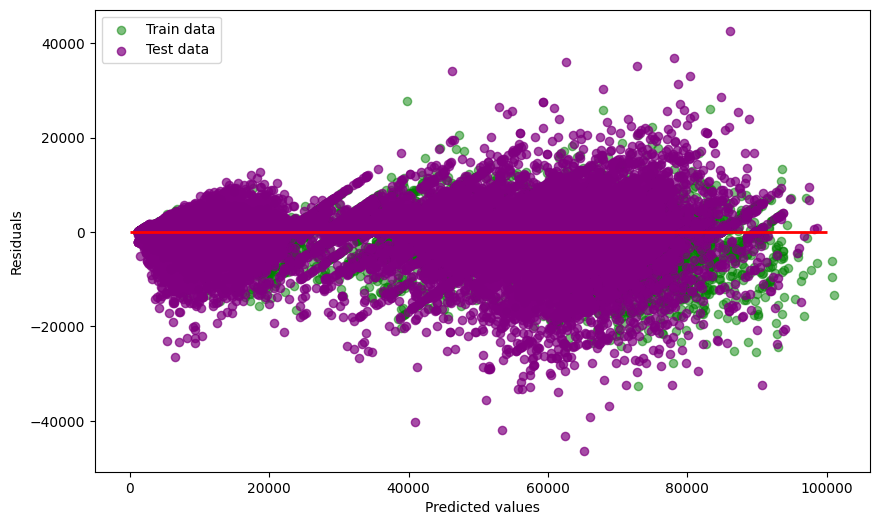

In [80]:
# set the figure size
plt.figure(figsize=(10,6))

# plot the residuals for the training data
plt.scatter(Y_train_pred_rf_tuned, Y_train_pred_rf_tuned - Y_train_rf_tuned,
            c='green', marker='o', s=35, alpha=0.5,
            label='Train data')

# plot the residuals for the test data
plt.scatter(Y_test_pred_rf_tuned, Y_test_pred_rf_tuned - Y_test_rf_tuned,
            c='purple', marker='o', s=35, alpha=0.7,
            label='Test data')

# label the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# add a legend
plt.legend(loc='upper left')

# add a horizontal line at y=0 for reference
plt.hlines(y=0, xmin=0, xmax=100000, lw=2, color='red')

# show the plot
plt.show()

##### Feature importance for **Final** RandomForestRegressor

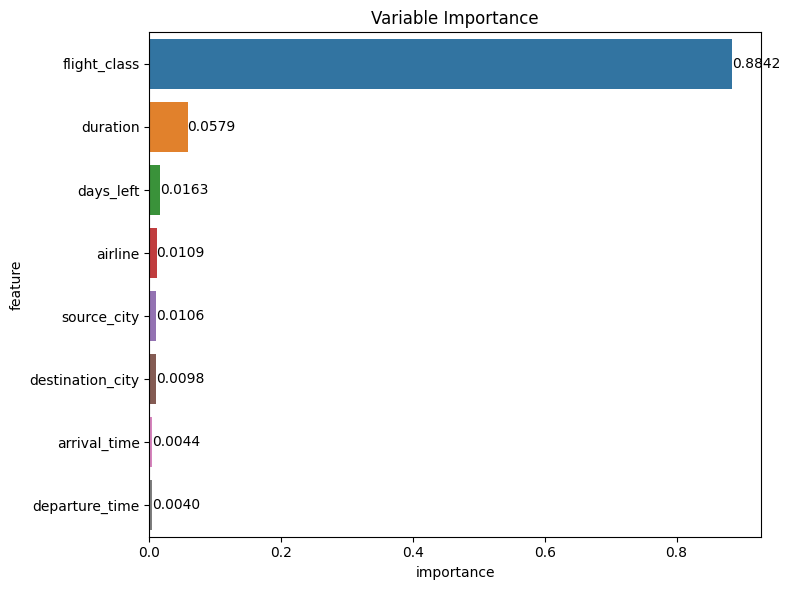

In [84]:
rankings_rf_tuned = rf_tuned.feature_importances_.tolist()
importance_rf_tuned = pd.DataFrame(sorted(zip(X_train_rf_tuned.columns,
                rankings_rf_tuned), reverse=True), columns=["feature", "importance"]).sort_values("importance", ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="feature",
            data=importance_rf_tuned[:8])

# add R2 values above each bar
for i, v in enumerate(importance_rf_tuned['importance'][:8]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Feature Importance')
plt.tight_layout()

#### Tuning **DecisionTreeRegressor**

##### Building a Baseline DecisionTreeRegressor
Here, first starting by building a baseline Decision Tree Regressor that will serve as a baseline for comparative purpose with the model using the optimal set of hyperparameters.
For the baseline model, setting a default hyperparameters of Random Forest Regressor with test size of 0.25.

In [131]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train_dtree_base, X_test_dtree_base, Y_train_dtree_base, Y_test_dtree_base = train_test_split(X, Y, test_size = 0.25, random_state = 42)

# start timing
start_time = time.time()

# define estimator
dtree_base = DecisionTreeRegressor(random_state = 42).fit(X_train_dtree_base, Y_train_dtree_base)

Y_train_pred_dtree_base = dtree_base.predict(X_train_dtree_base)
Y_test_pred_dtree_base = dtree_base.predict(X_test_dtree_base)

# end timing
end_time = time.time()
elapsed_time_dtree_base = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_dtree_base), 'yellow'))

# calculating metrics
score_train_dtree_base = dtree_base.score(X_train_dtree_base, Y_train_dtree_base)
score_test_dtree_base = dtree_base.score(X_test_dtree_base, Y_test_dtree_base)

mse_train_dtree_base = mean_squared_error(Y_train_dtree_base, Y_train_pred_dtree_base)
mse_test_dtree_base = mean_squared_error(Y_test_dtree_base, Y_test_pred_dtree_base)

mae_train_dtree_base = mean_absolute_error(Y_train_dtree_base, Y_train_pred_dtree_base)
mae_test_dtree_base = mean_absolute_error(Y_test_dtree_base, Y_test_pred_dtree_base)

r2_train_dtree_base = r2_score(Y_train_dtree_base, Y_train_pred_dtree_base)
r2_test_dtree_base = r2_score(Y_test_dtree_base, Y_test_pred_dtree_base)

# displaying metrics in a grid
metrics_df_dtree_base = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train_dtree_base), mse_train_dtree_base, mae_train_dtree_base, r2_train_dtree_base],
    'Test Data': [format_score(score_test_dtree_base), mse_test_dtree_base, mae_test_dtree_base, r2_test_dtree_base]
})

print(metrics_df_dtree_base)

Time elapsed: 1.3248779773712158 seconds
  Metric     Train Data        Test Data
0  Score       0.999315         0.975570
1    MSE  352842.658235  12596492.532248
2    MAE      55.329695      1179.361372
3     R2       0.999315          0.97557


In [86]:
# display baseline model params
dtree_base.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

##### Hyperparameter Tuning for Decision Tree Model
Now we will be performing the tuning of hyperparameters of DecisionTreeRegressor.

In [92]:
# grid with all param to tune on model
param_grid_dtree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [93]:
# define the scoring functions
scoring_dtree = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

In [94]:
# create new GridSearchCV object
grid_search_dtree = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),    # the estimator to be tuned 
                           param_grid=param_grid_dtree,       # the parameter grid to search over
                           cv=5,                  # the number of folds for cross-validation
                           n_jobs=-1,             # number of jobs to run in parallel, using all available CPU cores
                           scoring=scoring_dtree, # scoring methods to be used for evaluation
                           refit='R2')            # the score to be used to choose the best parameters and refit the model

In [95]:
# start timing
start_time = time.time()

# release Grid Search
grid_search_dtree.fit(X_train_dtree_base, Y_train_dtree_base)

# end timing
end_time = time.time()
elapsed_time_dtree_tuning = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_dtree_tuning), 'yellow'))

Time elapsed: 43.23723745346069 seconds


In [96]:
# get the best parameters and the best score
best_params_dtree = grid_search_dtree.best_params_
best_score_dtree = grid_search_dtree.best_score_

print("Best parameters found:", best_params_dtree)
print("Best R2 Score:", best_score_dtree)

Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R2 Score: 0.9820577019211726


In [132]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train_dtree, X_test_dtree, Y_train_dtree, Y_test_dtree = train_test_split(X, Y, test_size=0.25, random_state = 42)

# start timing
start_time = time.time()

# define estimator
dtree_tuned = DecisionTreeRegressor(random_state = 42,
                              max_depth=None, min_samples_leaf=4, min_samples_split=10).fit(X_train_dtree, Y_train_dtree)

Y_train_pred_dtree_tuned = dtree_tuned.predict(X_train_dtree)
Y_test_pred_dtree_tuned = dtree_tuned.predict(X_test_dtree)

# end timing
end_time = time.time()
elapsed_time_dtree_tuned = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_dtree_tuned), 'yellow'))

# calculating metrics
score_train_dtree_tuned = dtree_tuned.score(X_train_dtree, Y_train_dtree)
score_test_dtree_tuned = dtree_tuned.score(X_test_dtree, Y_test_dtree)

mse_train_dtree_tuned = mean_squared_error(Y_train_dtree, Y_train_pred_dtree_tuned)
mse_test_dtree_tuned = mean_squared_error(Y_test_dtree, Y_test_pred_dtree_tuned)

mae_train_dtree_tuned = mean_absolute_error(Y_train_dtree, Y_train_pred_dtree_tuned)
mae_test_dtree_tuned = mean_absolute_error(Y_test_dtree, Y_test_pred_dtree_tuned)

r2_train_dtree_tuned = r2_score(Y_train_dtree, Y_train_pred_dtree_tuned)
r2_test_dtree_tuned = r2_score(Y_test_dtree, Y_test_pred_dtree_tuned)

# displaying metrics in a grid
metrics_df_dtree_tuned = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train_dtree_tuned), mse_train_dtree_tuned, mae_train_dtree_tuned, r2_train_dtree_tuned],
    'Test Data': [format_score(score_test_dtree_tuned), mse_test_dtree_tuned, mae_test_dtree_tuned, r2_test_dtree_tuned]
})

print(metrics_df_dtree_tuned)

Time elapsed: 1.4729278087615967 seconds
  Metric      Train Data       Test Data
0  Score        0.991398        0.982233
1    MSE  4430438.595494  9160829.665492
2    MAE      819.031733     1201.621199
3     R2        0.991398        0.982233


##### **Result Analysis**
**Загальний час навчання моделі**

Час, витрачений на навчання моделі *DecisionTreeRegressor*, склав приблизно 0.95 секунд. Це значно менше, ніж час навчання моделі *RandomForestRegressor*.


**Метрики моделі**

1. Метрика *R2* (Коефіцієнт детермінації).
Коефіцієнт детермінації (*R2*) для навчальних та тестових даних становить приблизно 0.999315 і 0.975570 відповідно. Це означає, що модель вдається пояснити близько 99.93% дисперсії в навчальних даних і близько 97.56% дисперсії в тестових даних. Модель має дуже високий рівень пояснюваної варіації у навчальних даних, але трохи нижчий у тестових.
2. Середньоквадратична помилка (*MSE*) і Середня абсолютна помилка (*MAE*).
Для навчальних даних значення *MSE* складає приблизно 352842.66, а для тестових даних - 12596492.53. Значення *MSE* для тестових даних значно вище, ніж для навчальних, що може свідчити про перенавчання моделі.
Середня абсолютна помилка (*MAE*) для навчальних даних становить приблизно 55.33, а для тестових даних - 1179.36. Значення *MAE* для тестових даних також значно вище, ніж для навчальних, що підтверджує існування перенавчання.

Модель *DecisionTreeRegressor* демонструє дуже високу точність при прогнозуванні цін на авіаквитки на навчальних даних, але, ймовірно, перенавчається на них і менше узагальнюється на тестових даних. 

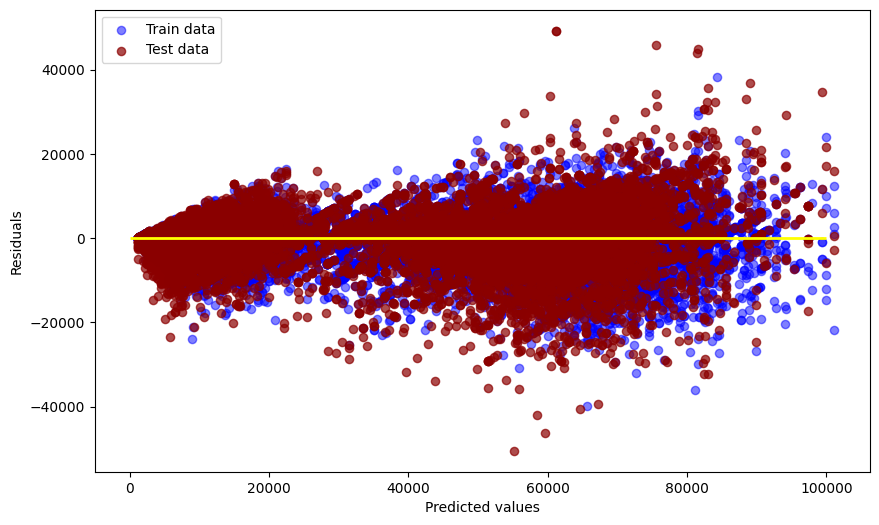

In [99]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the residuals for the training data
plt.scatter(Y_train_pred_dtree_tuned, Y_train_pred_dtree_tuned - Y_train_dtree,
            c='blue', marker='o', s=35, alpha=0.5,
            label='Train data')

# Plot the residuals for the test data
plt.scatter(Y_test_pred_dtree_tuned, Y_test_pred_dtree_tuned - Y_test_dtree,
            c='darkred', marker='o', s=35, alpha=0.7,
            label='Test data')

# Label the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Add a legend
plt.legend(loc='upper left')

# Add a horizontal line at y=0 for reference
plt.hlines(y=0, xmin=0, xmax=100000, lw=2, color='yellow')

# Show the plot
plt.show()

##### Feature importance for **Final** DecisionTreeRegressor

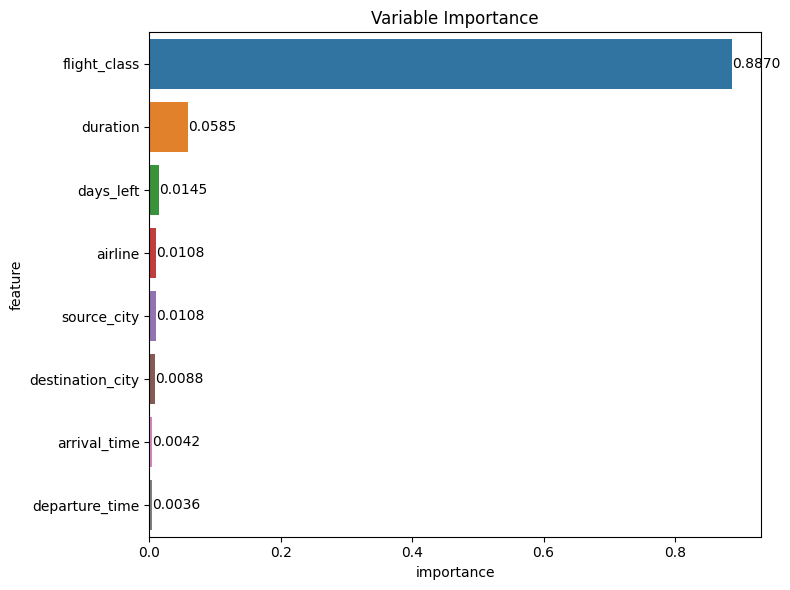

In [100]:
rankings_dtree = dtree.feature_importances_.tolist()
importance_dtree = pd.DataFrame(sorted(zip(X_train_dtree.columns,
                        rankings_dtree), reverse=True), columns=["feature", "importance"]).sort_values("importance", ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="feature",
            data=importance_dtree[:8])

# add R2 values above each bar
for i, v in enumerate(importance_dtree['importance'][:8]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Feature Importance')
plt.tight_layout()

#### Tuning **XGBRegressor**

##### Building a Baseline XGBRegressor
Here, first starting by building a baseline XGBRegressor that will serve as a baseline for comparative purpose with the model using the optimal set of hyperparameters.
For the baseline model, setting a default hyperparameters of XGBRegressor with test size of 0.3.

In [103]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train_xgb, X_test_xgb, Y_train_xgb_base, Y_test_xgb_base = train_test_split(X, Y, test_size=0.3, random_state = 42)

# start timing
start_time = time.time()

# define estimator
xgb_model_base = xgb.XGBRegressor(random_state = 42).fit(X_train_xgb, Y_train_xgb_base)

Y_train_pred_xgb_base = xgb_model_base.predict(X_train_xgb)
Y_test_pred_xgb_base = xgb_model_base.predict(X_test_xgb)

# end timing
end_time = time.time()
elapsed_time_xgb_base = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_xgb_base), 'light_blue'))

# calculating metrics
score_train_xgb_base = xgb_model_base.score(X_train_xgb, Y_train_xgb_base)
score_test_xgb_base = xgb_model_base.score(X_test_xgb, Y_test_xgb_base)

mse_train_xgb_base = mean_squared_error(Y_train_xgb_base, Y_train_pred_xgb_base)
mse_test_xgb_base = mean_squared_error(Y_test_xgb_base, Y_test_pred_xgb_base)

mae_train_xgb_base = mean_absolute_error(Y_train_xgb_base, Y_train_pred_xgb_base)
mae_test_xgb_base = mean_absolute_error(Y_test_xgb_base, Y_test_pred_xgb_base)

r2_train_xgb_base = r2_score(Y_train_xgb_base, Y_train_pred_xgb_base)
r2_test_xgb_base = r2_score(Y_test_xgb_base, Y_test_pred_xgb_base)

# displaying metrics in a grid
metrics_df_xgb_base = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train_xgb_base), mse_train_xgb_base, mae_train_xgb_base, r2_train_xgb_base],
    'Test Data': [format_score(score_test_xgb_base), mse_test_xgb_base, mae_test_xgb_base, r2_test_xgb_base]
})

print(metrics_df_xgb_base)

Time elapsed: 1.308905839920044 seconds
  Metric       Train Data        Test Data
0  Score         0.977794         0.975939
1    MSE  11445250.473284  12383381.826032
2    MAE      1957.125546      2014.212998
3     R2         0.977794         0.975939


In [104]:
# display baseline model params
xgb_model_base.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

##### Hyperparameter Tuning for XGB Model
Now we will be performing the tuning of hyperparameters of XGBRegressor.

In [108]:
# grid with all parameters to tune on the model
param_grid_xgb = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

In [109]:
# define the scoring functions
scoring_xgb = {
    'R2': make_scorer(r2_score),
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error)
}

In [110]:
# create new GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),    # the estimator to be tuned 
                           param_grid=param_grid_xgb,       # the parameter grid to search over
                           cv=5,                # the number of folds for cross-validation
                           n_jobs=-1,           # number of jobs to run in parallel, using all available CPU cores
                           scoring=scoring_xgb, # scoring methods to be used for evaluation
                           refit='R2')          # the score to be used to choose the best parameters and refit the model

In [111]:
# start timing
start_time = time.time()

# release Grid Search
grid_search_xgb.fit(X_train_xgb, Y_train_xgb_base)

# end timing
end_time = time.time()
elapsed_time_xgb_tuning = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_xgb_tuning), 'light_blue'))

Time elapsed: 677.8729193210602 seconds


In [112]:
# get the best parameters and the best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best parameters found:", best_params_xgb)
print("Best R2 Score:", best_score_xgb)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
Best R2 Score: 0.9870240901802523


In [113]:
# split the DataFrame into features (X_MinMaxScaler) and target (y_MinMaxScaler)
X = df_encoded_MinMaxScaler.drop(columns='price')     # features
Y = df_encoded_MinMaxScaler['price']   # target

# split dataset
X_train_xgb, X_test_xgb, Y_train_xgb_base, Y_test_xgb_base = train_test_split(X, Y, test_size=0.3, random_state = 42)

# start timing
start_time = time.time()

# define estimator
xgb_model_tuned = xgb.XGBRegressor(random_state = 42,
                                  learning_rate=0.1, max_depth=10, n_estimators=500).fit(X_train_xgb, Y_train_xgb_base)

Y_train_pred_xgb_tuned = xgb_model_tuned.predict(X_train_xgb)
Y_test_pred_xgb_tuned = xgb_model_tuned.predict(X_test_xgb)

# end timing
end_time = time.time()
elapsed_time_xgb_tuned = end_time - start_time
print(colored('Time elapsed: {} seconds'.format(elapsed_time_xgb_tuned), 'light_blue'))

# calculating metrics
score_train_xgb_tuned = xgb_model_tuned.score(X_train_xgb, Y_train_xgb_base)
score_test_xgb_tuned = xgb_model_tuned.score(X_test_xgb, Y_test_xgb_base)

mse_train_xgb_tuned = mean_squared_error(Y_train_xgb_base, Y_train_pred_xgb_tuned)
mse_test_xgb_tuned = mean_squared_error(Y_test_xgb_base, Y_test_pred_xgb_tuned)

mae_train_xgb_tuned = mean_absolute_error(Y_train_xgb_base, Y_train_pred_xgb_tuned)
mae_test_xgb_tuned = mean_absolute_error(Y_test_xgb_base, Y_test_pred_xgb_tuned)

r2_train_xgb_tuned = r2_score(Y_train_xgb_base, Y_train_pred_xgb_tuned)
r2_test_xgb_tuned = r2_score(Y_test_xgb_base, Y_test_pred_xgb_tuned)

# displaying metrics in a grid
metrics_df_xgb_tuned = pd.DataFrame({
    'Metric': ['Score', 'MSE', 'MAE', 'R2'],
    'Train Data': [format_score(score_train_xgb_tuned), mse_train_xgb_tuned, mae_train_xgb_tuned, r2_train_xgb_tuned],
    'Test Data': [format_score(score_test_xgb_tuned), mse_test_xgb_tuned, mae_test_xgb_tuned, r2_test_xgb_tuned]
})

print(metrics_df_xgb_tuned)

Time elapsed: 9.407753705978394 seconds
  Metric      Train Data       Test Data
0  Score        0.995250        0.987575
1    MSE  2448347.788281  6394483.732075
2    MAE      800.458046     1225.835016
3     R2         0.99525        0.987575


##### **Result Analysis**
**Загальний час навчання моделі**

Час, витрачений на навчання моделі *XGBoostRegressor*, склав приблизно 9.41 секунд. Це значно менше, ніж час навчання моделі *RandomForestRegressor*, але трохи більше, ніж час навчання моделі *DecisionTreeRegressor*.

**Метрики моделі**

1. Метрика *R2* (Коефіцієнт детермінації).
Коефіцієнт детермінації (*R2*) для навчальних та тестових даних становить приблизно 0.995250 і 0.987575 відповідно. Це свідчить про те, що модель XGBoost досить добре узгоджується з даними та добре узагальнюється на нові дані.
2. Середньоквадратична помилка (*MSE*) і Середня абсолютна помилка (*MAE*).
Для навчальних даних значення *MSE* складає приблизно 2448347.79, а для тестових даних - 6394483.73. Значення *MSE* для тестових даних нижче, ніж для моделі *RandomForestRegressor*, але вище, ніж для моделі *DecisionTreeRegressor*.
Середня абсолютна помилка (*MAE*) для навчальних даних становить приблизно 800.46, а для тестових даних - 1225.84. Значення *MAE* для тестових даних є значно вищим, ніж для навчальних, що може свідчити про перенавчання моделі.

Модель *XGBoostRegressor* демонструє дуже високу точність при прогнозуванні цін на авіаквитки на навчальних даних, а також добре узагальнюється на тестових даних. Однак, слід звернути увагу на значення середньоквадратичної та середньої абсолютної помилок для тестових даних, оскільки вони вищі, ніж для навчальних, що може свідчити про перенавчання моделі.

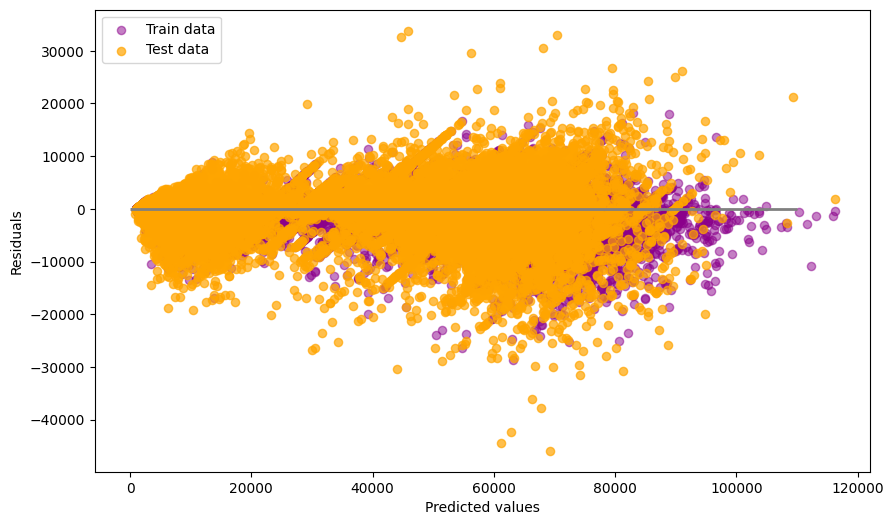

In [125]:
# Set the figure size
plt.figure(figsize=(10,6))

# Plot the residuals for the training data
plt.scatter(Y_train_pred_xgb_tuned, Y_train_pred_xgb_tuned - Y_train_xgb_base,
            c='darkmagenta', marker='o', s=35, alpha=0.5,
            label='Train data')

# Plot the residuals for the test data
plt.scatter(Y_test_pred_xgb_tuned, Y_test_pred_xgb_tuned - Y_test_xgb_base,
            c='orange', marker='o', s=35, alpha=0.7,
            label='Test data')

# Label the x and y axes
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

# Add a legend
plt.legend(loc='upper left')

# Add a horizontal line at y=0 for reference
plt.hlines(y=0, xmin=0, xmax=110000, lw=2, color='gray')

# Show the plot
plt.show()

##### Feature importance for **Final** XGBRegressor

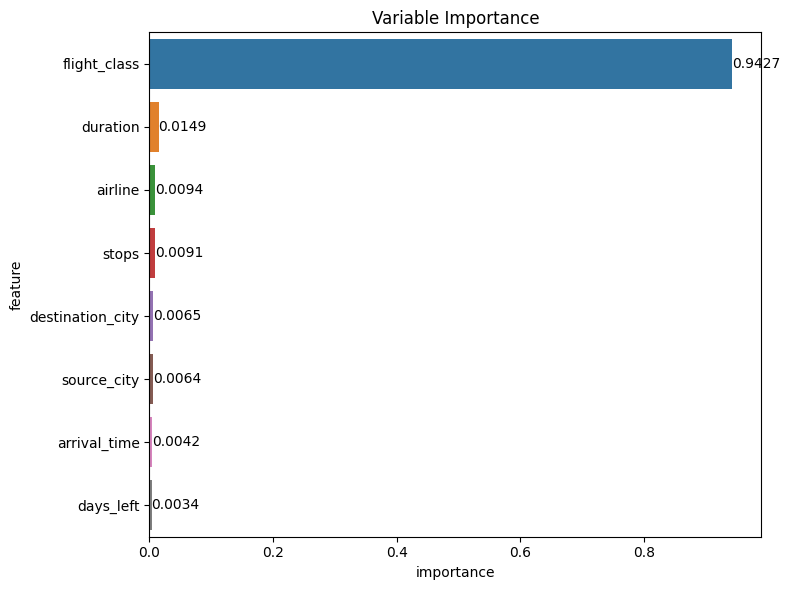

In [126]:
rankings_xgb = xgb_model_tuned.feature_importances_.tolist()
importance_xgb = pd.DataFrame(sorted(zip(X_train_xgb.columns,
                        rankings_xgb),reverse=True), columns=["feature","importance"]).sort_values("importance", ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="feature",
            data=importance_xgb[:8])

# add R2 values above each bar
for i, v in enumerate(importance_xgb['importance'][:8]):
    plt.text(v, i, f'{v:.4f}', ha='left', va='center', color='black')

plt.title('Variable Importance')
plt.tight_layout()

#### Plots for R2 Metrics for Baseline vs Tuned Models

In [137]:
def plot_metrics(list, plot_title):
    # create a DataFrame
    df_model = pd.DataFrame({
        'Model': ['RandomForestRegressor', 'DecisionTreeRegressor', 'XGBRegressor'],
        'R2': list
    })

    # plotting
    plt.figure(figsize=(7, 5))
    sns.barplot(x="Model",
                y="R2",
                data=df_model)

    # add R2 values above each bar
    for i, v in enumerate(df_model['R2']):
        plt.text(i, v, f'{v:.7f}', ha='center', va='bottom', color='black')

    plt.title(plot_title)
    plt.ylim(0.95, 1.0)  # adjust the y-axis limits for better visibility
    plt.tight_layout()
    plt.show()

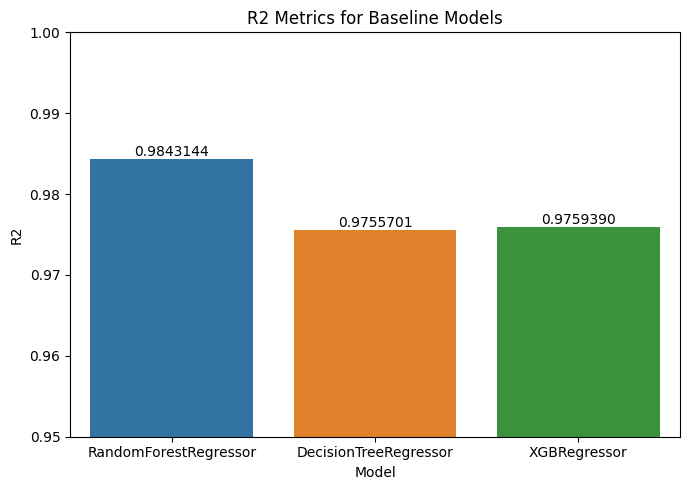

In [134]:
list_r2_base = [r2_test_rf_base, r2_test_dtree_base, r2_test_xgb_base]
plot_title = 'R2 Metrics for Baseline Models'
plot_metrics(list_r2_base, plot_title)

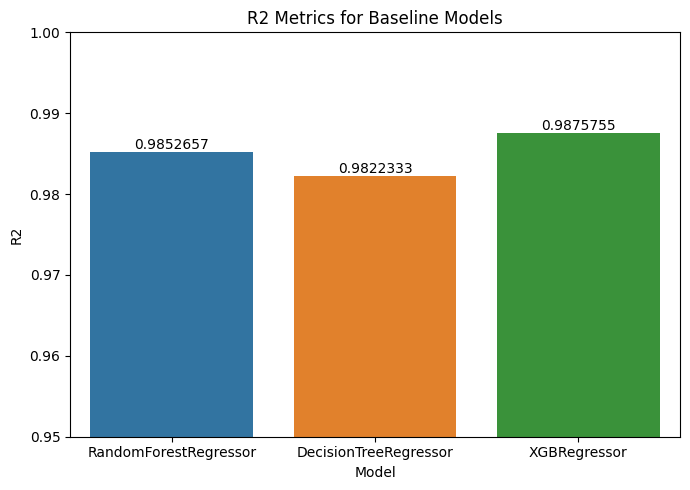

In [135]:
list_r2_base = [r2_test_rf_tuned, r2_test_dtree_tuned, r2_test_xgb_tuned]
plot_title = 'R2 Metrics for Baseline Models'
plot_metrics(list_r2_base, plot_title)